<img src="https://www.uss.cl/wp-content/themes/uss/img/logo.svg" width="300" height="300" style="float:left; padding:16px"/>

<p style="text-align: center; font-size:44px ;"> Predicción de la mortalidad de salmónidos en centro de aguamar a través de un modelo de machine learning</p>

<p style="text-align: center; font-size:14px ;"> Juan Pablo Carrasco <br> Richard Sandoval Aguilar</p>

# 0 Introducción

<img src="salmon1.jpg" alt="salmon">


La industria de la **salmonicultura, o cultivo de salmones**, es uno de los sectores más importantes en la producción de alimentos a nivel mundial. Sin embargo, como en cualquier actividad agrícola o pecuaria, enfrenta desafíos relacionados con la salud y el bienestar de los peces. Uno de los aspectos cruciales en la salmonicultura es el control y **la predicción del porcentaje de mortalidad en las poblaciones de salmones**.

La predicción del porcentaje de mortalidad se ha convertido en una herramienta fundamental para los acuicultores, ya que les permite tomar decisiones informadas y proactivas para prevenir y manejar posibles brotes de enfermedades y otros factores que podrían causar una alta tasa de mortalidad en los peces. La capacidad de anticipar y predecir estos eventos es esencial para garantizar la sostenibilidad y rentabilidad de la industria.

Existen varios factores que pueden influir en la tasa de mortalidad de los salmones, como enfermedades infecciosas, cambios ambientales, calidad del agua, nutrición deficiente y estrés. La detección temprana de estos factores y la predicción de su impacto en la población de peces pueden ayudar a implementar medidas preventivas y de control de manera oportuna, minimizando así las pérdidas económicas y ambientales.

Además de prevenir la mortalidad, la predicción precisa del porcentaje de mortalidad en la salmonicultura también contribuye a mejorar el bienestar de los peces. El monitoreo regular de los indicadores de salud y el seguimiento de las condiciones ambientales permiten a los acuicultores implementar medidas de manejo adecuadas, como ajustar la alimentación, mejorar la calidad del agua o administrar tratamientos veterinarios específicos. Esto ayuda a minimizar el sufrimiento de los peces y mantener su salud óptima, promoviendo así una producción sostenible y ética.

En resumen, la predicción del porcentaje de mortalidad en la salmonicultura es de vital importancia para la industria, ya que permite tomar decisiones estratégicas basadas en datos y anticiparse a posibles problemas que podrían afectar la salud y el bienestar de los peces. Al prevenir la mortalidad y mejorar las condiciones de crianza, se promueve la sostenibilidad económica y ambiental de la industria, así como el cumplimiento de estándares éticos y de bienestar animal.

En el presente trabajo se analizara y realira siguiendo la metodologia CRISP-DM  (Cross Industry Standard Process for Data Mining), utilizando los datos o set de datos recolectados que provienen de sistemas de produccion (especificamente un barrio productivo) y externos relativos a variables productivas, alimentacion, mortalidad, tratamientos y tambien exogenas al cultivo en si, como los son las variables ambientales que pudiesen ayudar a entrenar de mejor forma los modelos a comparar, mejorando los apendizajes y bajando las tasas de perdida.

# 1 Importar librerias

In [1]:
#importe de librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

import numpy as np
import pandas as pd

from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
 
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
 
from sklearn.metrics import precision_score
from sklearn.metrics import   f1_score,  mean_absolute_percentage_error
  
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
import multiprocessing
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from scipy.stats import shapiro, levene

import warnings
warnings.filterwarnings('ignore')

# 2 Analisis Exploratorio 
### Descubrir y visualizar los datos para obtener un mayor entendimiento

In [69]:
df= pd.read_excel("./dsPecesDiaB34.xlsx")

In [4]:
print(f"El contexto del set de datos referente a informacion de mortalidad de salmon contiene {df.shape[0]} filas  y {df.shape[1]} columnas o variables que a continuacion se muestran : \n")

El contexto del set de datos referente a informacion de mortalidad de salmon contiene 104878 filas  y 36 columnas o variables que a continuacion se muestran : 



| Variable                       | Tipo            | Descripcion                                                     |
|--------------------------------|-----------------|-----------------------------------------------------------------|
| Specie                         | object          | Especie de Salmon - Salar - Coho - Trucha                       |
| Barrio                         | int64           | Área Geográfica que agrupa varios Centros de cultivo (sites)   |
| SiteName                       | object          | Centro de cultivo                                               |
| Latitude                       | float64         | Coordenada geográfica de Site                                   |
| Longitude                      | float64         | Coordenada geográfica de Site                                   |
| ModelName                      | object          | Modelo de crecimiento                                           |
| Unit                           | object          | Unidad de cultivo                                               |
| Date                           | datetime64  | Fecha de cultivo                                                |
| Year                           | int64           | Año                                                             |
| Month                          | int64           | Mes                                                             |
| Day                            | int64           | Día                                                             |
| Season                         | object          | Estación del año                                                |
| CloseCount                     | int64           | Cantidad de peces a la fecha                                     |
| CloseBiomass                   | float64         | Biomasa                                                         |
| CloseWeight                    | float64         | Peso promedio                                                   |
| LiveDaysInProduct              | int64           | Día en la unidad de cultivo                                     |
| MortalityCount                 | int64           | Cantidad de peces muertos                                        |
| MortalityBiomass               | float64         | Biomasa por mortalidad                                           |
| MortalityPorc                  | float64         | Porcentaje de mortalidad                                         |
| IsInfectiousTypeMortality      | int64           | Flag que indica si tuvo mortalidad el tipo infecciosa           |
| InfectiousMortalityCount       | int64           | Cantidad de mortalidad por motivo infeccioso                    |
| MortalityPorcInfectious        | float64         | Porcentaje de mortalidad por tipo infeccioso                    |
| MortalityByMechanicalDamage    | int64           | Cantidad de mortalidad por motivo Daño mecánico                 |
| MortalityByPredator            | int64           | Cantidad de mortalidad por motivo Predador                      |
| FeedDays                       | int64           | Días de alimento                                                |
| Density                        | float64         | Densidad de la población en la unidad de cultivo                |
| Temperature                    | float64         | Temperatura del mar                                             |
| Oxygen                         | float64         | Oxígeno registrado                                              |
| HasMovement                    | int64           | Flag que indica si tuvo movimiento (ingreso, salida, cosecha)   |
| LostFeed                       | object          | Motivo del ayuno (si lo tuvo)                                    |
| FeedAmount                     | float64         | Cantidad de alimento suministrado                                |
| ActiveSubstance                | object          | Sustancia activa de tratamiento                                 |
| TreatAmount                    | float64         | Cantidad de tratamiento suministrado                            |
| TreatmentMethod                | object          | Método de aplicación del tratamiento                            |
| TreatmentProduct               | object          | Producto usado en el tratamiento                                |
| TreatActiveSubstanceConcentration | float64       | Concentración activa del tratamiento                            |



In [5]:
display(df.head(3))
display(df.tail(3))
display(df.describe().T)

Specie  Barrio  SiteName   Latitude  Longditude         ModelName  \
0   Coho      34  Site 3Av -40.712784  -74.005941  FCR Coho Plantel   
1   Coho      34  Site 3Av -40.712784  -74.005941  FCR Coho Plantel   
2   Coho      34  Site 3Av -40.712784  -74.005941  FCR Coho Plantel   

         Unit       Date  Year  Month  ...  Temperature   Oxygen  HasMovement  \
0  101-154718 2019-01-01  2019      1  ...      13.4625  10.2625            0   
1  101-154718 2019-01-02  2019      1  ...      13.4625  10.2625            0   
2  101-154718 2019-01-03  2019      1  ...      13.4625  10.2625            0   

   LostFeed  FeedAmount  ActiveSubstance  TreatAmount  TreatmentMethod  \
0         -         0.0                -          0.0                -   
1         -         0.0                -          0.0                -   
2         -         0.0                -          0.0                -   

   TreatmentProduct  TreatActiveSubstanceConcentration  
0                 -                                0.0  
1                 -                                0.0  
2                 -                                0.0  

[3 rows x 36 columns]

Specie  Barrio  SiteName   Latitude  Longditude  \
104875  Salar      34  Site 7Se -44.058581  -73.116767   
104876  Salar      34  Site 7Se -44.058581  -73.116767   
104877  Salar      34  Site 7Se -44.058581  -73.116767   

                     ModelName          Unit       Date  Year  Month  ...  \
104875  FCB SALAR AE 1,24 2023  J 118-339922 2023-07-14  2023      7  ...   
104876  FCB SALAR AE 1,24 2023  J 118-339922 2023-07-15  2023      7  ...   
104877  FCB SALAR AE 1,24 2023  J 118-339922 2023-07-16  2023      7  ...   

        Temperature Oxygen  HasMovement  LostFeed  FeedAmount  \
104875          9.5   88.0            0         -       337.0   
104876          9.4   89.0            0         -       503.0   
104877          9.5   86.0            0         -       344.0   

        ActiveSubstance  TreatAmount  TreatmentMethod  TreatmentProduct  \
104875                -          0.0                -                 -   
104876                -          0.0                -                 -   
104877                -          0.0                -                 -   

        TreatActiveSubstanceConcentration  
104875                                0.0  
104876                                0.0  
104877                                0.0  

[3 rows x 36 columns]

count          mean           std  \
Barrio                             104878.0  3.400000e+01  0.000000e+00   
Latitude                           104878.0 -1.202869e+06  7.178740e+06   
Longditude                         104878.0 -1.996538e+06  1.191536e+07   
Year                               104878.0  2.020520e+03  1.378430e+00   
Month                              104878.0  5.884389e+00  3.353683e+00   
Day                                104878.0  1.556189e+01  8.794228e+00   
CloseCount                         104878.0  4.302490e+04  1.125461e+04   
CloseBiomass                       104878.0  8.811857e+04  6.116241e+04   
CloseWeight                        104878.0  2.201193e+03  1.583235e+03   
LiveDaysInProduct                  104878.0  1.861299e+02  1.218386e+02   
MortalityCount                     104878.0  2.003301e+01  7.767615e+01   
MortalityBiomass                   104878.0  5.474384e+01  2.626805e+02   
MortalityPorc                      104878.0  3.504269e-01  7.968631e+01   
IsInfectiousTypeMortality          104878.0  3.348939e-01  4.719556e-01   
InfectiousMortalityCount           104878.0  5.964158e+00  3.155217e+01   
MortalityPorcInfectious            104878.0  1.672325e-01  2.800119e-01   
MortalityByMechanicalDamage        104878.0  1.119854e+00  1.368959e+01   
MortalityByPredator                104878.0  2.224575e+00  1.440428e+01   
FeedDays                           104878.0  9.028776e-01  2.961257e-01   
Density                            104878.0  6.670457e+00  4.547743e+00   
Temperature                        104878.0  1.145264e+01  1.645975e+00   
Oxygen                             104878.0  7.539618e+01  3.053039e+01   
HasMovement                        104878.0  5.406282e-03  7.332875e-02   
FeedAmount                         104878.0  5.957402e+02  9.493576e+02   
TreatAmount                        104878.0  1.744068e+02  3.989765e+02   
TreatActiveSubstanceConcentration  104878.0  8.388890e-01  5.341290e+00   

                                            min           25%           50%  \
Barrio                             3.400000e+01     34.000000     34.000000   
Latitude                          -4.404682e+07    -44.077267    -44.073086   
Longditude                        -7.310945e+07    -73.205200    -73.148483   
Year                               2.019000e+03   2019.000000   2021.000000   
Month                              1.000000e+00      3.000000      6.000000   
Day                                1.000000e+00      8.000000     15.000000   
CloseCount                        -2.490000e+02  34463.000000  42757.000000   
CloseBiomass                       0.000000e+00  35999.196289  78183.910156   
CloseWeight                        0.000000e+00    809.301697   1913.748305   
LiveDaysInProduct                  1.000000e+00     82.000000    170.000000   
MortalityCount                     0.000000e+00      1.000000      5.000000   
MortalityBiomass                   0.000000e+00      0.255803      5.716701   
MortalityPorc                     -4.920635e+01      0.001970      0.010833   
IsInfectiousTypeMortality          0.000000e+00      0.000000      0.000000   
InfectiousMortalityCount           0.000000e+00      0.000000      0.000000   
MortalityPorcInfectious            0.000000e+00      0.000000      0.000000   
MortalityByMechanicalDamage        0.000000e+00      0.000000      0.000000   
MortalityByPredator                0.000000e+00      0.000000      0.000000   
FeedDays                           0.000000e+00      1.000000      1.000000   
Density                            0.000000e+00      2.630697      5.953391   
Temperature                        1.000000e+00     10.000000     11.200000   
Oxygen                             0.000000e+00     68.000000     82.200000   
HasMovement                        0.000000e+00      0.000000      0.000000   
FeedAmount                         0.000000e+00    203.000000    531.000000   
TreatAmount                        0.

> Cuenta con las siguientes variables categoricas.

In [7]:
df.select_dtypes(include=['object']).describe()

Specie  SiteName                    ModelName        Unit  Season  \
count   104878    104878                       104878      104878  104878   
unique       6         9                            6         368       4   
top      Salar  Site 1Ma  FCR Salar Macho_Crecimiento  211-155074   Otoño   
freq     84424     22547                        52957         501   30489   

       LostFeed ActiveSubstance TreatmentMethod TreatmentProduct  
count    104878          104878          104878           104878  
unique       26               7               5               11  
top           -               -               -                -  
freq      94692           80868           80868            80868

> Se puede observar las especies que fueron cultivadas en este barrio, son Salmon Salar, SalmonChoho y trucha

In [70]:
df['Specie'].unique()

array(['Coho', 'Salar', 'Trucha', 'Coho CNS', 'Atlantic Salmon CNS M',
       'Atlantic Salmon CNS H'], dtype=object)

In [71]:
dic_replace = {'Atlantic Salmon CNS M': "Salar",
               'Atlantic Salmon CNS H': "Salar",
               'Coho CNS':"Coho"}

df['Specie'] = df['Specie'] \
                     .map(dic_replace) \
                     .fillna(df['Specie'])
df.Specie.value_counts().sort_index()

Coho       7805
Salar     92875
Trucha     4198
Name: Specie, dtype: int64

### Busqueda de Nulos, duplicados y NA

In [10]:
df.isnull().sum() * 100 /len(df)

Specie                               0.0
Barrio                               0.0
SiteName                             0.0
Latitude                             0.0
Longditude                           0.0
ModelName                            0.0
Unit                                 0.0
Date                                 0.0
Year                                 0.0
Month                                0.0
Day                                  0.0
Season                               0.0
CloseCount                           0.0
CloseBiomass                         0.0
CloseWeight                          0.0
LiveDaysInProduct                    0.0
MortalityCount                       0.0
MortalityBiomass                     0.0
MortalityPorc                        0.0
IsInfectiousTypeMortality            0.0
InfectiousMortalityCount             0.0
MortalityPorcInfectious              0.0
MortalityByMechanicalDamage          0.0
MortalityByPredator                  0.0
FeedDays        

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

Specie                               0
Barrio                               0
SiteName                             0
Latitude                             0
Longditude                           0
ModelName                            0
Unit                                 0
Date                                 0
Year                                 0
Month                                0
Day                                  0
Season                               0
CloseCount                           0
CloseBiomass                         0
CloseWeight                          0
LiveDaysInProduct                    0
MortalityCount                       0
MortalityBiomass                     0
MortalityPorc                        0
IsInfectiousTypeMortality            0
InfectiousMortalityCount             0
MortalityPorcInfectious              0
MortalityByMechanicalDamage          0
MortalityByPredator                  0
FeedDays                             0
Density                  

## Categorias de los datos

In [72]:
# Columnas categoricas y numericas
cat_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = df.select_dtypes(include=['float64', 'int']).columns.to_list()

print('Num Cols ->' + str(numeric_cols))
print('Cat Cols ->' + str(cat_cols))

Num Cols ->['Barrio', 'Latitude', 'Longditude', 'Year', 'Month', 'Day', 'CloseCount', 'CloseBiomass', 'CloseWeight', 'LiveDaysInProduct', 'MortalityCount', 'MortalityBiomass', 'MortalityPorc', 'IsInfectiousTypeMortality', 'InfectiousMortalityCount', 'MortalityPorcInfectious', 'MortalityByMechanicalDamage', 'MortalityByPredator', 'FeedDays', 'Density', 'Temperature', 'Oxygen', 'HasMovement', 'FeedAmount', 'TreatAmount', 'TreatActiveSubstanceConcentration']
Cat Cols ->['Specie', 'SiteName', 'ModelName', 'Unit', 'Season', 'LostFeed', 'ActiveSubstance', 'TreatmentMethod', 'TreatmentProduct']


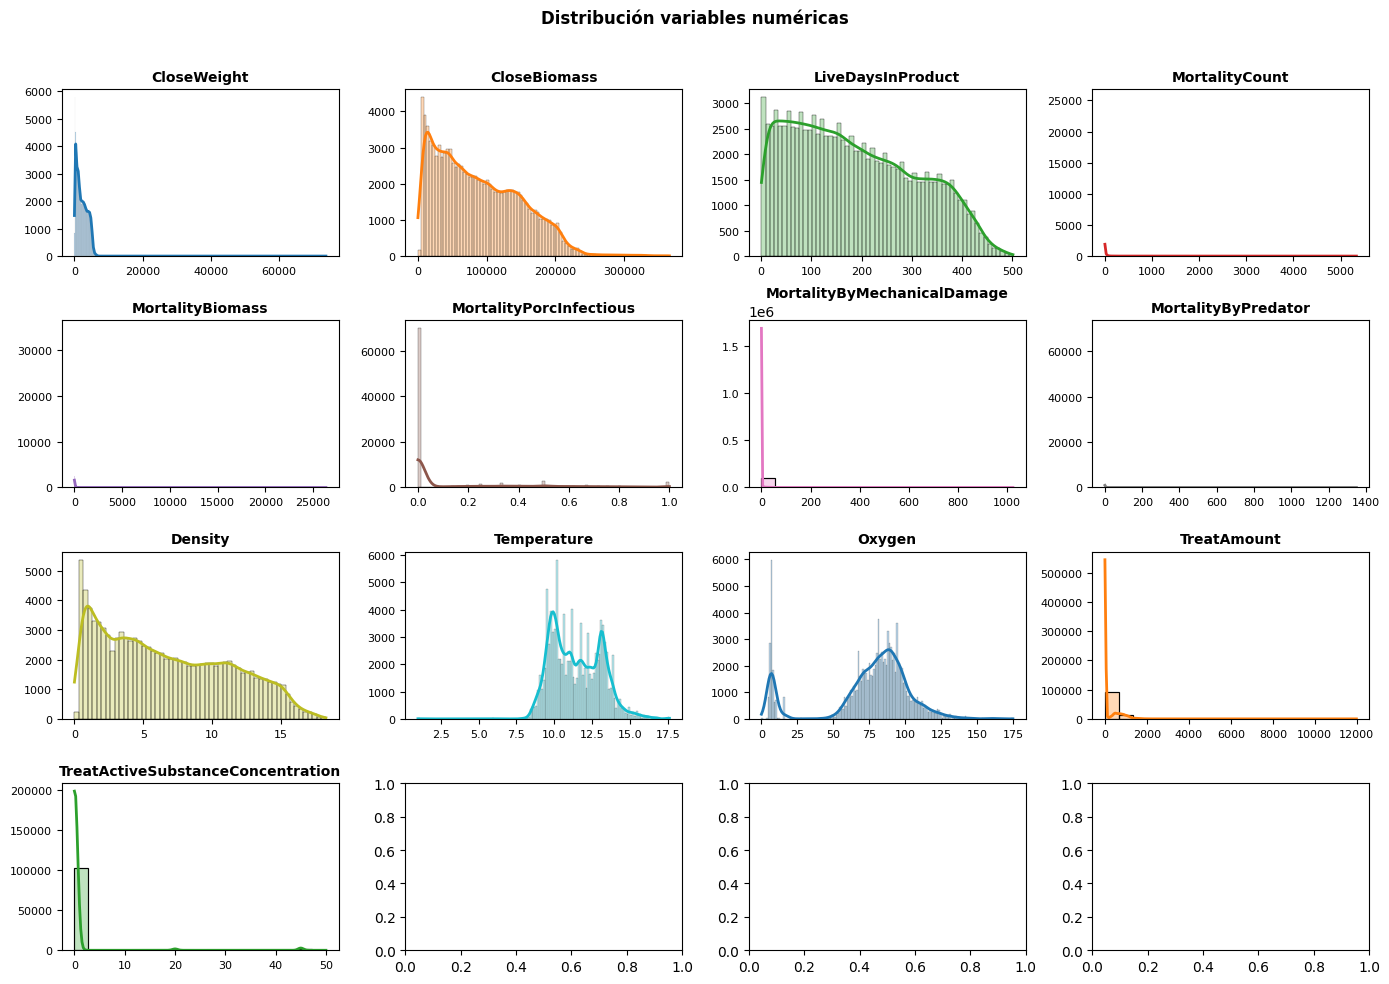

In [14]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 10))
axes = axes.flat
columnas_numeric = ['CloseWeight','CloseBiomass', 'LiveDaysInProduct', 'MortalityCount', 'MortalityBiomass','MortalityPorcInfectious','MortalityByMechanicalDamage','MortalityByPredator','Density', 'Temperature', 'Oxygen','TreatAmount', 'TreatActiveSubstanceConcentration']#numeric_cols # df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
  
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 12, fontweight = "bold");

Index(['Specie', 'SiteName', 'ModelName', 'Season', 'LostFeed',
       'ActiveSubstance', 'TreatmentMethod', 'TreatmentProduct'],
      dtype='object')


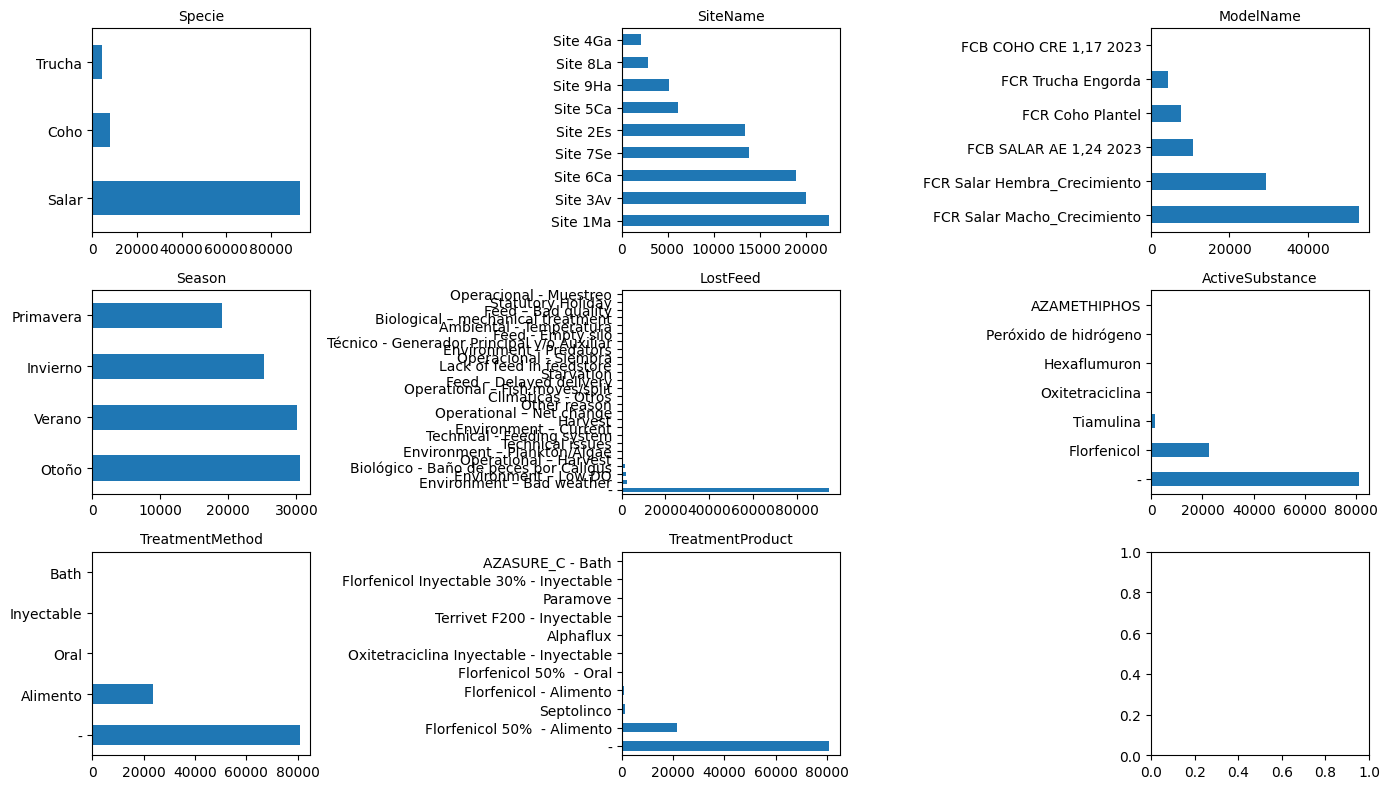

In [15]:
# Gráfico para cada variable cualitativa
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object', 'category']).columns  
columnas_object = columnas_object.drop('Unit')
print(columnas_object)
for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10)
    axes[i].set_xlabel("")
 
fig.tight_layout()

> Se grafica variables 'LostFeed' (ayuno), 'ActiveSubstance' (sustancia activa del tratamiento), 'TreatmentMethod' (metodo del tratamiento), 'TreatmentProduct' (producto ocupado en el tratamiento), sin data que ensuciaba el analisis por elevada dispersion 

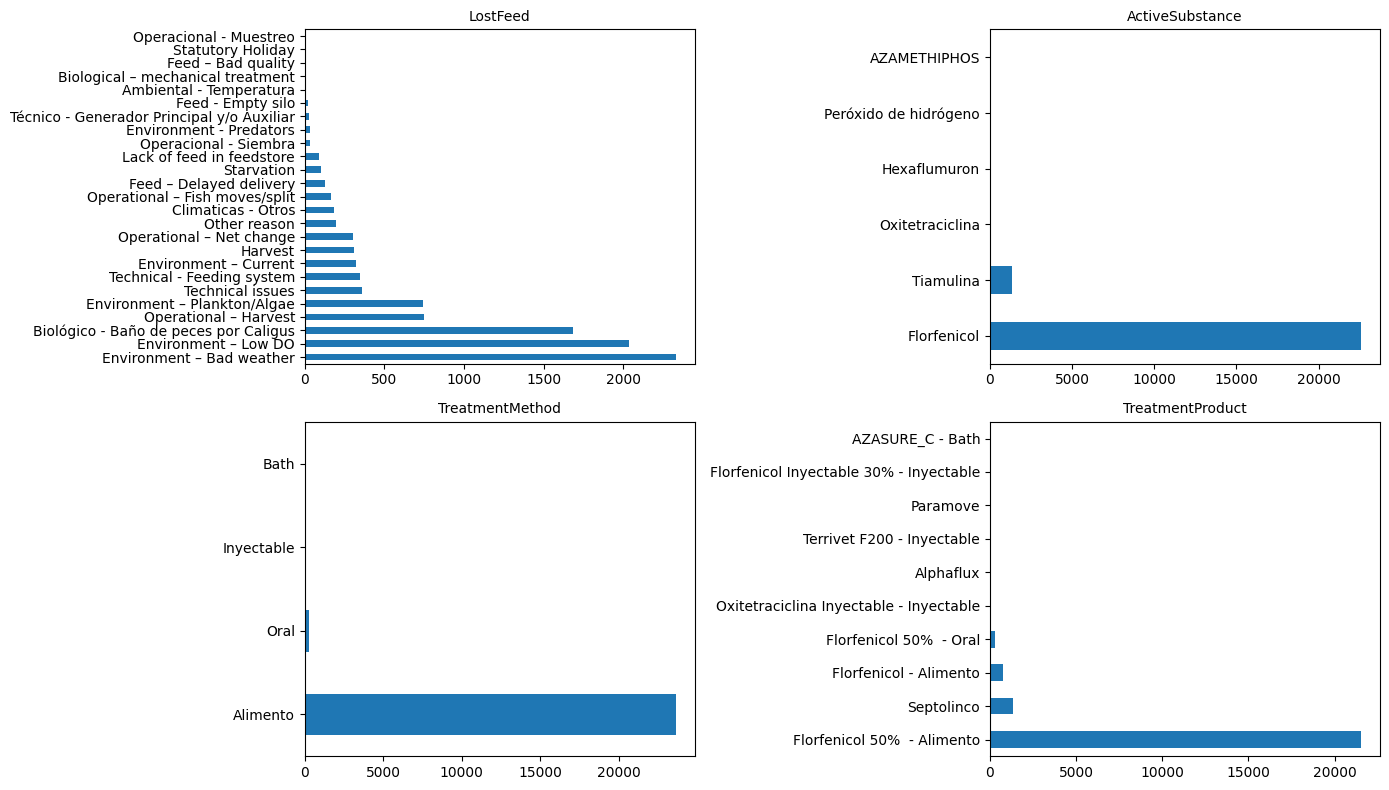

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
axes = axes.flat

for i, colum in enumerate([ 'LostFeed', 'ActiveSubstance', 'TreatmentMethod', 'TreatmentProduct']):
    df.query(colum + "!= '-'")['' + colum + ''].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10)
    axes[i].set_xlabel("")
fig.tight_layout()

## Revision / remoción de Outliers

hay varias caracteristicas con mucho oulier , treatmentAmount

Los outlier de las variables ambientales, temp, oxy y densidad

<Axes: xlabel='LiveDaysInProduct', ylabel='MortalityPorc'>

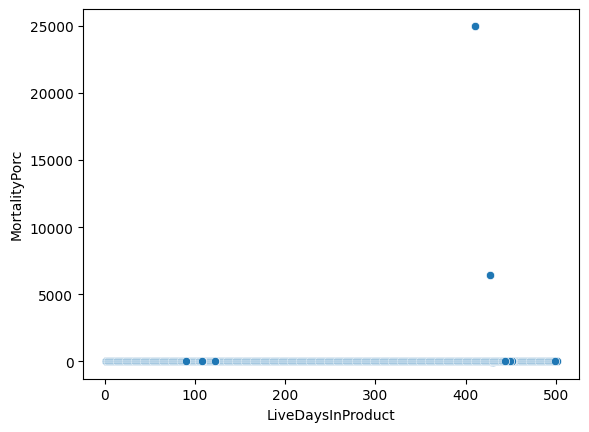

In [17]:
# Antes de la remocion de outliers
sb.scatterplot(x=df.LiveDaysInProduct , y=df.MortalityPorc)

In [73]:
display(df.query('CloseCount < 0'))
display(df.query('MortalityPorc>10'))
display(df.query('Temperature > 20'))
display(df.query('MortalityPorc<0'))

Specie  Barrio  SiteName   Latitude  Longditude  \
87471  Salar      34  Site 1Ma -44.077267  -73.103258   
87472  Salar      34  Site 1Ma -44.077267  -73.103258   
87473  Salar      34  Site 1Ma -44.077267  -73.103258   
87474  Salar      34  Site 1Ma -44.077267  -73.103258   
87475  Salar      34  Site 1Ma -44.077267  -73.103258   
92322  Salar      34  Site 7Se -44.058581  -73.116767   

                          ModelName        Unit       Date  Year  Month  ...  \
87471   FCR Salar Macho_Crecimiento  124-155247 2020-03-02  2020      3  ...   
87472   FCR Salar Macho_Crecimiento  124-155247 2020-03-03  2020      3  ...   
87473   FCR Salar Macho_Crecimiento  124-155247 2020-03-04  2020      3  ...   
87474   FCR Salar Macho_Crecimiento  124-155247 2020-03-05  2020      3  ...   
87475   FCR Salar Macho_Crecimiento  124-155247 2020-03-06  2020      3  ...   
92322  FCR Salar Hembra_Crecimiento   03-143541 2020-02-15  2020      2  ...   

       Temperature      Oxygen  HasMovement               LostFeed  \
87471    12.800000   70.000000            0  Operational – Harvest   
87472    12.900000   80.000000            0  Operational – Harvest   
87473    13.200000   87.000000            0  Operational – Harvest   
87474    13.200000   55.000000            0  Operational – Harvest   
87475    14.200000  102.000000            0  Operational – Harvest   
92322    13.233333   48.333333            0                Harvest   

       FeedAmount  ActiveSubstance  TreatAmount  TreatmentMethod  \
87471         0.0                -          0.0                -   
87472         0.0                -          0.0                -   
87473         0.0                -          0.0                -   
87474         0.0                -          0.0                -   
87475         0.0                -          0.0                -   
92322         0.0                -          0.0                -   

       TreatmentProduct  TreatActiveSubstanceConcentration  
87471                 -                                0.0  
87472                 -                                0.0  
87473                 -                                0.0  
87474                 -                                0.0  
87475                 -                                0.0  
92322                 -                                0.0  

[6 rows x 36 columns]

Specie  Barrio  SiteName   Latitude  Longditude  \
29889  Salar      34  Site 6Ca -44.073086  -73.148483   
32495  Salar      34  Site 6Ca -44.073086  -73.148483   
32496  Salar      34  Site 6Ca -44.073086  -73.148483   
41425  Salar      34  Site 6Ca -44.073086  -73.148483   
41426  Salar      34  Site 6Ca -44.073086  -73.148483   
69688  Salar      34  Site 1Ma -44.077267  -73.103258   
87471  Salar      34  Site 1Ma -44.077267  -73.103258   
92322  Salar      34  Site 7Se -44.058581  -73.116767   
94711  Salar      34  Site 7Se -44.058581  -73.116767   

                          ModelName        Unit       Date  Year  Month  ...  \
29889  FCR Salar Hembra_Crecimiento  105-231647 2021-02-03  2021      2  ...   
32495   FCR Salar Macho_Crecimiento  108-155100 2020-04-05  2020      4  ...   
32496   FCR Salar Macho_Crecimiento  108-155100 2020-04-06  2020      4  ...   
41425  FCR Salar Hembra_Crecimiento  208-231417 2022-04-12  2022      4  ...   
41426  FCR Salar Hembra_Crecimiento  208-231417 2022-04-13  2022      4  ...   
69688   FCR Salar Macho_Crecimiento  102-155232 2020-01-19  2020      1  ...   
87471   FCR Salar Macho_Crecimiento  124-155247 2020-03-02  2020      3  ...   
92322  FCR Salar Hembra_Crecimiento   03-143541 2020-02-15  2020      2  ...   
94711  FCR Salar Hembra_Crecimiento   09-143602 2020-01-18  2020      1  ...   

       Temperature      Oxygen  HasMovement               LostFeed  \
29889    14.700000  146.000000            0                Harvest   
32495    12.900000   62.000000            0  Operational – Harvest   
32496    12.000000   61.000000            1  Operational – Harvest   
41425    11.300000   86.000000            0                      -   
41426    11.700000   86.000000            0                      -   
69688    12.900000   66.000000            0           Other reason   
87471    12.800000   70.000000            0  Operational – Harvest   
92322    13.233333   48.333333            0                Harvest   
94711    13.422222   52.777778            0   Environment – Low DO   

       FeedAmount  ActiveSubstance  TreatAmount  TreatmentMethod  \
29889         0.0                -          0.0                -   
32495         0.0                -          0.0                -   
32496         0.0                -          0.0                -   
41425       132.0                -          0.0                -   
41426       143.0                -          0.0                -   
69688         0.0                -          0.0                -   
87471         0.0                -          0.0                -   
92322         0.0                -          0.0                -   
94711         0.0                -          0.0                -   

       TreatmentProduct  TreatActiveSubstanceConcentration  
29889                 -                                0.0  
32495                 -                                0.0  
32496                 -                                0.0  
41425                 -                                0.0  
41426                 -                                0.0  
69688                 -                                0.0  
87471                 -                                0.0  
92322                 -                                0.0  
94711                 -                                0.0  

[9 rows x 36 columns]

Empty DataFrame
Columns: [Specie, Barrio, SiteName, Latitude, Longditude, ModelName, Unit, Date, Year, Month, Day, Season, CloseCount, CloseBiomass, CloseWeight, LiveDaysInProduct, MortalityCount, MortalityBiomass, MortalityPorc, IsInfectiousTypeMortality, InfectiousMortalityCount, MortalityPorcInfectious, MortalityByMechanicalDamage, MortalityByPredator, FeedDays, Density, Temperature, Oxygen, HasMovement, LostFeed, FeedAmount, ActiveSubstance, TreatAmount, TreatmentMethod, TreatmentProduct, TreatActiveSubstanceConcentration]
Index: []

[0 rows x 36 columns]

Specie  Barrio  SiteName   Latitude  Longditude  \
87473  Salar      34  Site 1Ma -44.077267  -73.103258   
87474  Salar      34  Site 1Ma -44.077267  -73.103258   

                         ModelName        Unit       Date  Year  Month  ...  \
87473  FCR Salar Macho_Crecimiento  124-155247 2020-03-04  2020      3  ...   
87474  FCR Salar Macho_Crecimiento  124-155247 2020-03-05  2020      3  ...   

       Temperature Oxygen  HasMovement               LostFeed  FeedAmount  \
87473         13.2   87.0            0  Operational – Harvest         0.0   
87474         13.2   55.0            0  Operational – Harvest         0.0   

       ActiveSubstance  TreatAmount  TreatmentMethod  TreatmentProduct  \
87473                -          0.0                -                 -   
87474                -          0.0                -                 -   

       TreatActiveSubstanceConcentration  
87473                                0.0  
87474                                0.0  

[2 rows x 36 columns]

> Inicialmente se quitan todos los registros de jaulas que tengan saldo negativo por ser considerados un error y los de porcentaje de mortalidad elevado, asumiendo una mala imputacion de los datos. 

In [74]:
df.drop(df.query('MortalityPorc > 15').index, inplace=True)
df.drop(df.query('MortalityPorc < 0').index, inplace=True)
df.drop(df.query('CloseCount < 10').index, inplace=True)

In [75]:
# Estadisticas despues de remocion de valores outliers.
df.describe().T

count          mean           std  \
Barrio                             104849.0  3.400000e+01  0.000000e+00   
Latitude                           104849.0 -1.203202e+06  7.179705e+06   
Longditude                         104849.0 -1.997090e+06  1.191696e+07   
Year                               104849.0  2.020520e+03  1.378492e+00   
Month                              104849.0  5.884911e+00  3.353698e+00   
Day                                104849.0  1.556354e+01  8.793984e+00   
CloseCount                         104849.0  4.303659e+04  1.123399e+04   
CloseBiomass                       104849.0  8.814178e+04  6.115383e+04   
CloseWeight                        104849.0  2.199946e+03  1.565498e+03   
LiveDaysInProduct                  104849.0  1.860745e+02  1.218024e+02   
MortalityCount                     104849.0  1.996915e+01  7.602696e+01   
MortalityBiomass                   104849.0  5.439242e+01  2.491511e+02   
MortalityPorc                      104849.0  5.062847e-02  2.121581e-01   
IsInfectiousTypeMortality          104849.0  3.348911e-01  4.719546e-01   
InfectiousMortalityCount           104849.0  5.953905e+00  3.146716e+01   
MortalityPorcInfectious            104849.0  1.672408e-01  2.800254e-01   
MortalityByMechanicalDamage        104849.0  1.118427e+00  1.368149e+01   
MortalityByPredator                104849.0  2.223779e+00  1.440326e+01   
FeedDays                           104849.0  9.031083e-01  2.958117e-01   
Density                            104849.0  6.672178e+00  4.547025e+00   
Temperature                        104849.0  1.145238e+01  1.645991e+00   
Oxygen                             104849.0  7.539814e+01  3.053073e+01   
HasMovement                        104849.0  5.293327e-03  7.256278e-02   
FeedAmount                         104849.0  5.959023e+02  9.494386e+02   
TreatAmount                        104849.0  1.744550e+02  3.990211e+02   
TreatActiveSubstanceConcentration  104849.0  8.391210e-01  5.342010e+00   

                                            min           25%           50%  \
Barrio                             3.400000e+01     34.000000     34.000000   
Latitude                          -4.404682e+07    -44.077267    -44.073086   
Longditude                        -7.310945e+07    -73.205200    -73.148483   
Year                               2.019000e+03   2019.000000   2021.000000   
Month                              1.000000e+00      3.000000      6.000000   
Day                                1.000000e+00      8.000000     15.000000   
CloseCount                         1.000000e+01  34473.000000  42760.000000   
CloseBiomass                       2.424800e+01  36029.024188  78211.941305   
CloseWeight                        8.199104e+01    809.284787   1913.422258   
LiveDaysInProduct                  1.000000e+00     82.000000    170.000000   
MortalityCount                     0.000000e+00      1.000000      5.000000   
MortalityBiomass                   0.000000e+00      0.257945      5.717287   
MortalityPorc                      0.000000e+00      0.001980      0.010834   
IsInfectiousTypeMortality          0.000000e+00      0.000000      0.000000   
InfectiousMortalityCount           0.000000e+00      0.000000      0.000000   
MortalityPorcInfectious            0.000000e+00      0.000000      0.000000   
MortalityByMechanicalDamage        0.000000e+00      0.000000      0.000000   
MortalityByPredator                0.000000e+00      0.000000      0.000000   
FeedDays                           0.000000e+00      1.000000      1.000000   
Density                            1.796148e-03      2.632817      5.955482   
Temperature                        1.000000e+00     10.000000     11.200000   
Oxygen                             0.000000e+00     68.000000     82.200000   
HasMovement                        0.000000e+00      0.000000      0.000000   
FeedAmount                         0.000000e+00    203.000000    531.000000   
TreatAmount                        0.

> % de mortalidad por dia en el unidad de cultivo despues de remocion de outliers

<Axes: xlabel='LiveDaysInProduct', ylabel='MortalityPorc'>

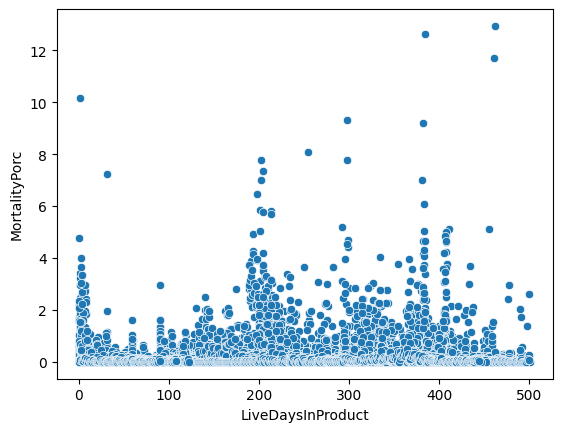

In [76]:
sb.scatterplot(x=df.LiveDaysInProduct , y=df.MortalityPorc)

> Boxplot revisando / buscando outliers en variables ambientales y densidad de jaulas.

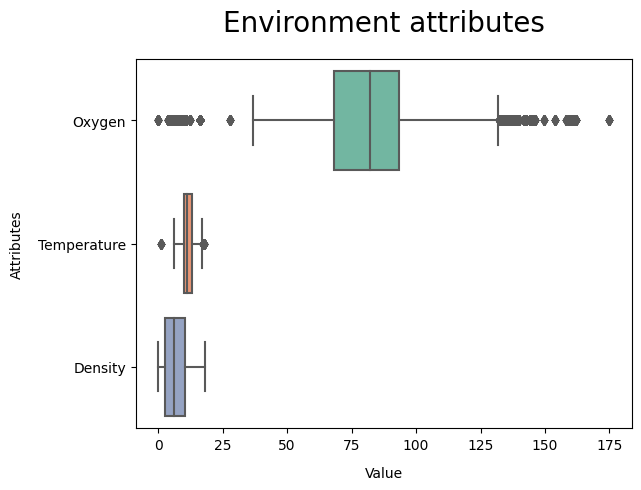

In [22]:
ax = sns.boxplot(data = df[["Oxygen", "Temperature",'Density']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 10, labelpad = 10)
ax.set_ylabel("Attributes", fontsize = 10, labelpad = 10)
ax.set_title("Environment attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 10)

> Se realiza grafico detallado de la variable Densidad de Cultivo.

In [23]:
import plotly.express as px
fig = px.histogram(df, x='Density')
fig.show()

fig = px.box(df, y='Density')
fig.show()

Grafico distribucion de temperaturas y oxigeno para cada estacion del año.

[Text(0.5, 0, 'Temperature (°C)'), Text(0, 0.5, 'count')]

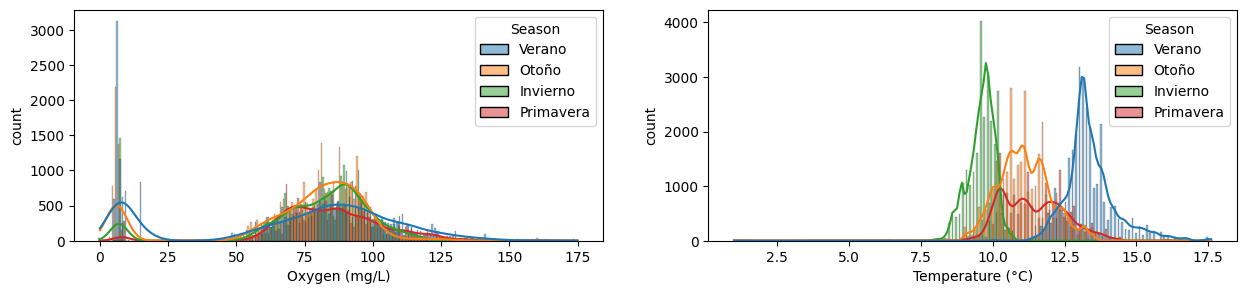

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3)) # oxigeno -  (mg/L)
sns.histplot(data=df, x='Oxygen', hue='Season', kde=True, multiple='dodge', shrink=2, ax=axes[0])
axes[0].set(xlabel='Oxygen (mg/L)', ylabel='count')
sns.histplot(data=df, x='Temperature', hue='Season', kde=True, multiple='dodge', shrink=2, ax=axes[1])
axes[1].set(xlabel='Temperature (°C)', ylabel='count')
#sns.histplot(data=df, x='InfectiousMortalityCount', hue='Season', kde=True, multiple='dodge', shrink=2, ax=axes[2])
 

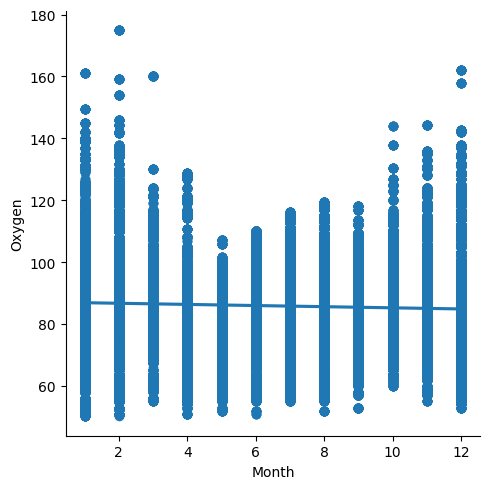

In [28]:
# Grafica removiendo el outliers con valor < 50
sns.lmplot(data=df[df.Oxygen>50],x='Month',y='Oxygen')

### Mas graficos de analisis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104849 entries, 0 to 104877
Data columns (total 36 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Specie                             104849 non-null  object        
 1   Barrio                             104849 non-null  int64         
 2   SiteName                           104849 non-null  object        
 3   Latitude                           104849 non-null  float64       
 4   Longditude                         104849 non-null  float64       
 5   ModelName                          104849 non-null  object        
 6   Unit                               104849 non-null  object        
 7   Date                               104849 non-null  datetime64[ns]
 8   Year                               104849 non-null  int64         
 9   Month                              104849 non-null  int64         
 10  Day                 

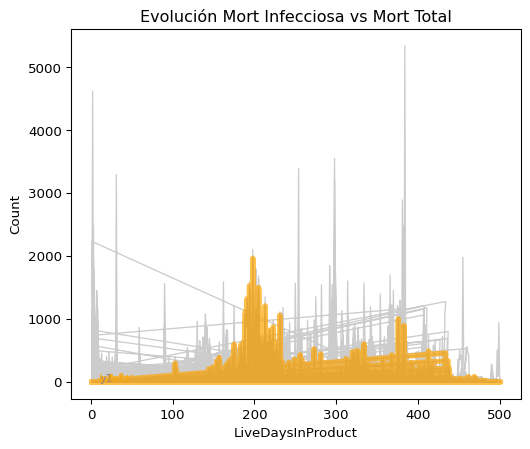

In [85]:
# tal vez buscar un grafico que mejor represente la mortalidad infecciona de la total, a medida que pasa el tiempo en la unidad de cultivo.

dfg=pd.DataFrame({'x': df.LiveDaysInProduct, 'y1': df.MortalityCount, 'y2': df.InfectiousMortalityCount })
#plt.style.use('seaborn-darkgrid')
# set figure size
my_dpi=96
plt.figure(figsize=(580/my_dpi, 480/my_dpi), dpi=my_dpi)

for column in dfg.drop('x', axis=1):
    plt.plot(dfg['x'], dfg[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.plot(dfg['x'], dfg['y2'], marker='', color='orange', linewidth=4, alpha=0.7)

# Change x axis limit
#plt.xlim(0,12)

# Let's annotate the plot
num=0
for i in dfg.values[9][1:]:
    num+=1
    name=list(dfg)[num]
    if name != 'y2':
        plt.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')

# And add a special annotation for the group we are interested in
plt.text(10.2, dfg.y2.tail(1), 'Infect', horizontalalignment='left', size='small', color='orange')
 
# Add titles
plt.title("Evolución Mort Infecciosa vs Mort Total", loc='center', fontsize=12, fontweight=10, color='black')
plt.xlabel("LiveDaysInProduct (days)")
plt.ylabel("Count")

# Show the graph
plt.show()

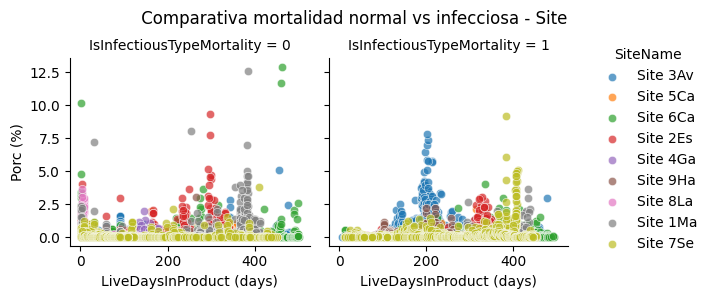

In [106]:
# Comparativa grafica que evidencia los periodos en donde se estan presentando los brotes infecciosos.
g = sns.FacetGrid(df, col="IsInfectiousTypeMortality", hue="SiteName",margin_titles=True)

g.map(sns.scatterplot, "LiveDaysInProduct", "MortalityPorc", alpha=.7)
g.set(xlabel='LiveDaysInProduct (days)', ylabel='Porc (%)' )
g.add_legend()
g.fig.subplots_adjust(top=0.82)
g.fig.suptitle(' Comparativa mortalidad normal vs infecciosa - Site', fontsize=12)
g

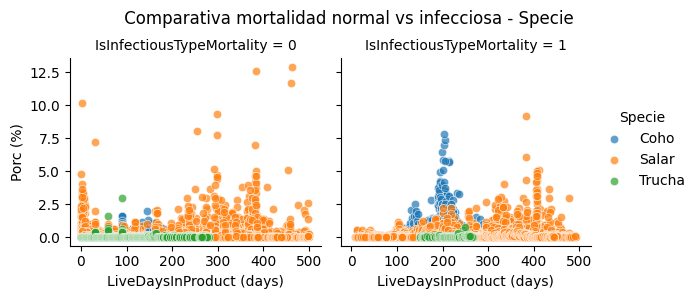

In [107]:
# Comparativa grafica que evidencia los periodos en donde se estan presentando los brotes infecciosos.
g = sns.FacetGrid(df, col="IsInfectiousTypeMortality", hue="Specie")
g.map(sns.scatterplot, "LiveDaysInProduct", "MortalityPorc", alpha=.7)
g.set(xlabel='LiveDaysInProduct (days)', ylabel='Porc (%)' )
g.add_legend()
g.fig.subplots_adjust(top=0.82)
g.fig.suptitle(' Comparativa mortalidad normal vs infecciosa - Specie', fontsize=12)
g

Justifica el problema, las enfermedades infeccioneas 'SRS','BKD','Tenacibaculosis','HSMI' estan asociadas a niveles preocupantes de mortalidad.
Se aprecia brote de mortalidad el tipo infeccioso a los 200 gramos app del centro Avellano.

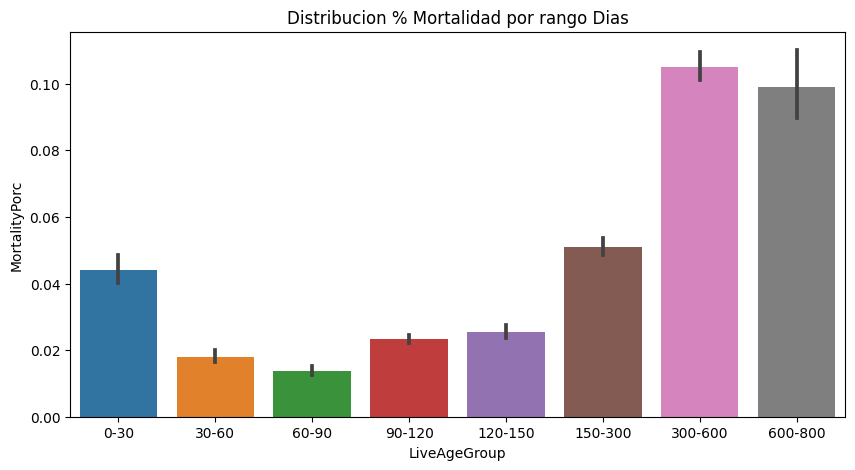

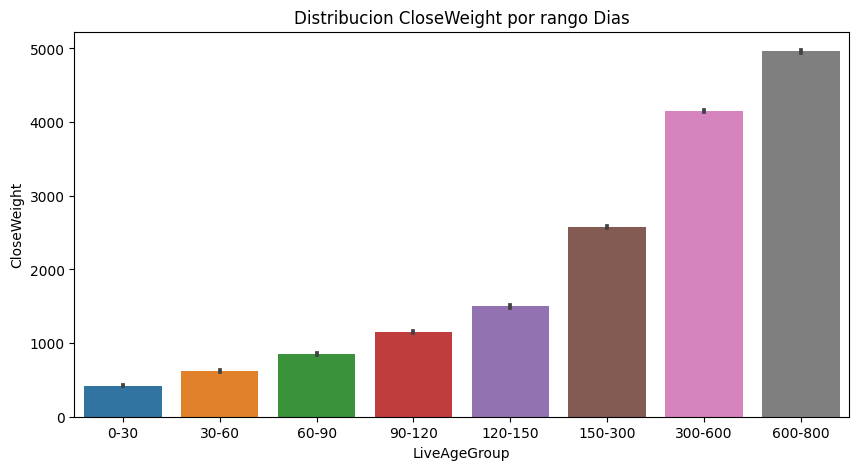

In [32]:
bins = [0, 30, 60, 90, 120, 150, 300, 400, 600]
labels = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-300', '300-600','600-800']
df['LiveAgeGroup'] = pd.cut(df["LiveDaysInProduct"], bins, labels = labels)

#Edad vs %mort
fig1=plt.figure(figsize=(10,5))
#sns.barplot(x="LiveAgeGroup", y="IsInfectiousTypeMortality", data=df)
sns.barplot(x="LiveAgeGroup", y="MortalityPorc", data=df).set(title='Distribucion % Mortalidad por rango Dias')
 
plt.show();

#Edad vs weigth
fig1=plt.figure(figsize=(10,5))
 #sns.barplot(x="LiveAgeGroup", y="IsInfectiousTypeMortality", data=df)
sns.barplot(x="LiveAgeGroup", y="CloseWeight", data=df).set(title='Distribucion CloseWeight por rango Dias')
 
plt.show();


Se generan bins para agrupar rangos de dias que los salmones estan en la unidad de cultivo de engorda, con el fin de observar distribiciones de porcentaje de mortalidad y peso por los dias de cultivo.

[Text(0.5, 1.0, 'Live day peer Season')]

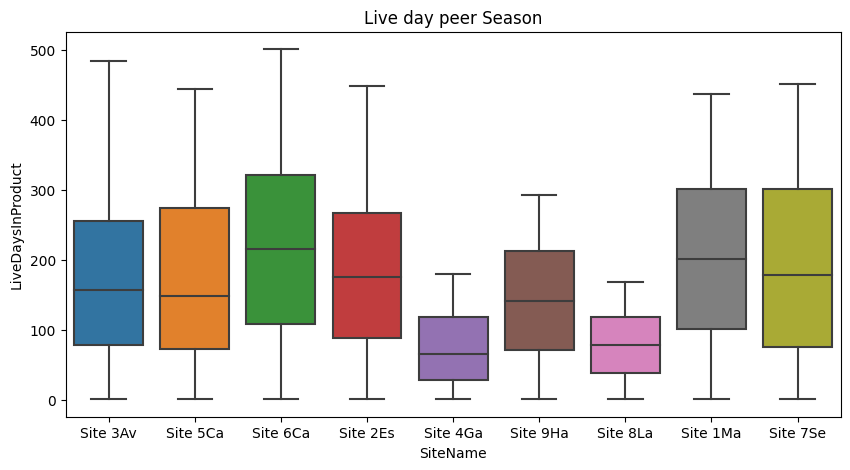

In [33]:
fig1=plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='SiteName', y='LiveDaysInProduct').set(title='Live day peer Season')

> Buscamos outlier para los dias que la unidad de cultivo tuvo ayuno, es decir no recibio alimentacion.

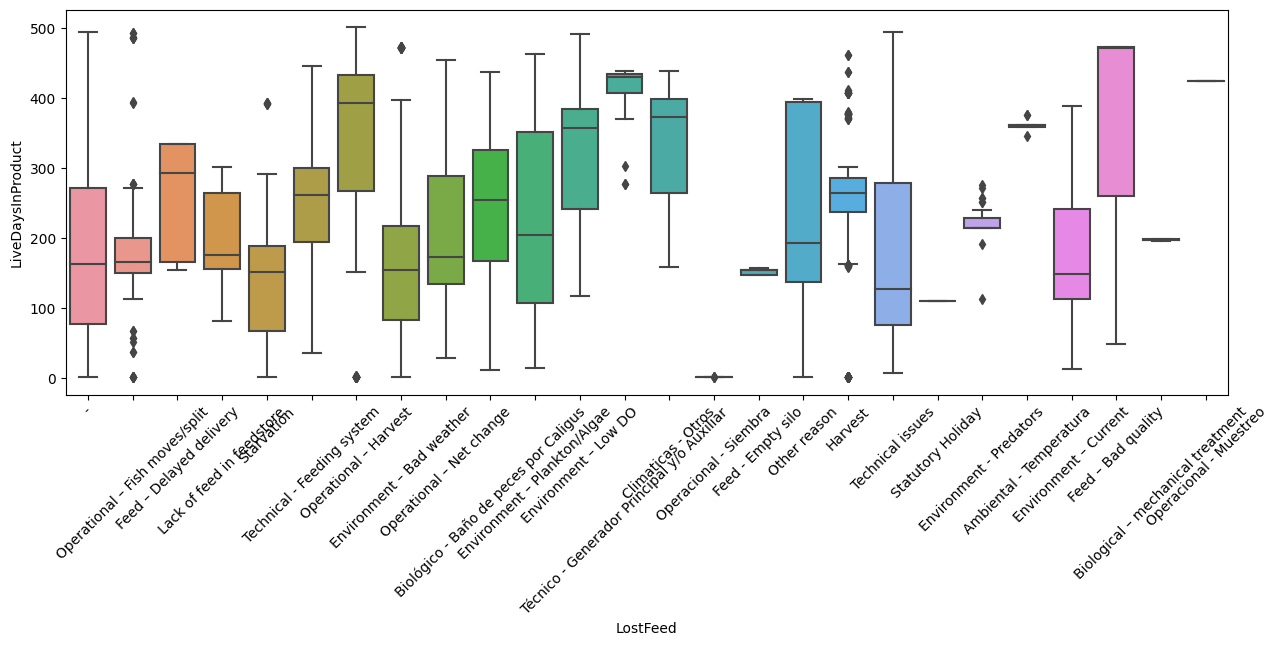

In [34]:
 fig1=plt.figure(figsize=(15,5))
#sns.boxplot(data=df.query("LostFeed !='Normal'"), x='LostFeed', y='LiveDaysInProduct').set(title='Live day peer Lost Feed')

ax = sns.boxplot(x='LostFeed', y='LiveDaysInProduct', data=df.query("LostFeed !='Normal'"))
plt.setp(ax.get_xticklabels(), rotation=45)
fig.tight_layout() 



[Text(0.5, 1.0, '% Mort day vs. CloseWeight')]

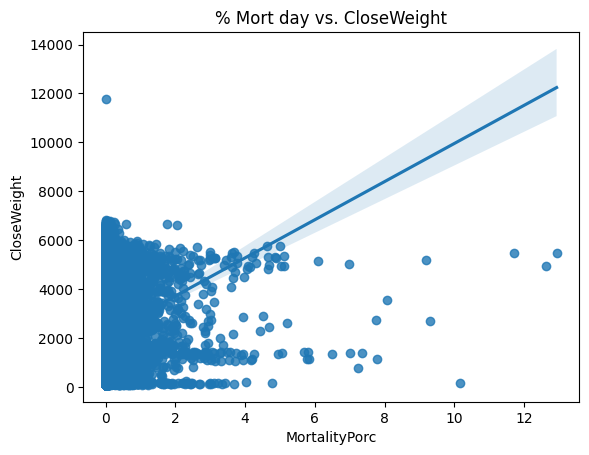

In [35]:
# Gráfico de regresion que relaciona al porcentaje de mortalidad con el peso de los peces.
sns.regplot(data=df, x='MortalityPorc', y='CloseWeight').set(title='% Mort day vs. CloseWeight')

Se observa que a medida que aumenta el peso,  aumente al porcentaje de mortalidad,  teniendo una directa relación.

<Axes: title={'center': 'Mortalidad por Centro'}, xlabel='SiteName', ylabel='MortalityPorc'>

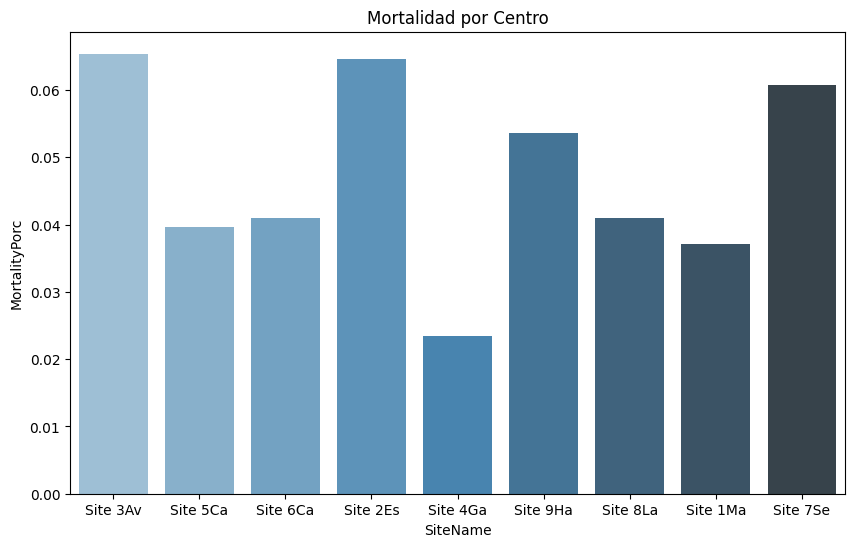

In [36]:

plt.figure(figsize=(10,6))
plt.title("Mortalidad por Centro")
sns.barplot(data=df, x='SiteName', y='MortalityPorc', ci= None, palette = "Blues_d")

Se observa que el Centro "Site 3Av", tiene una alta mortalidad a inicios del cultivo de sus jaulas.

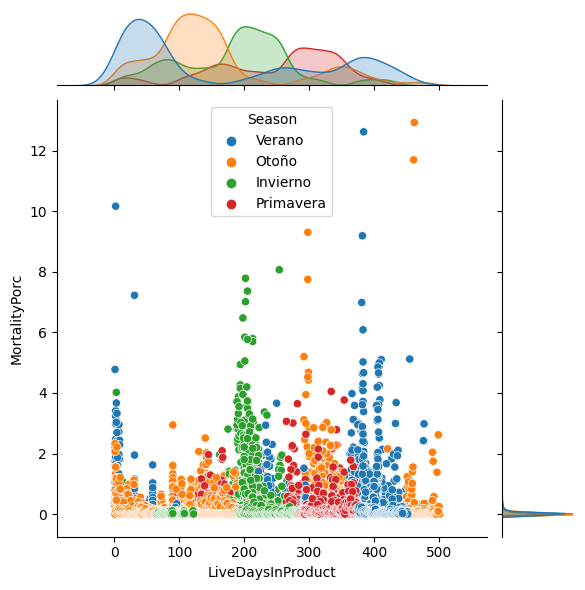

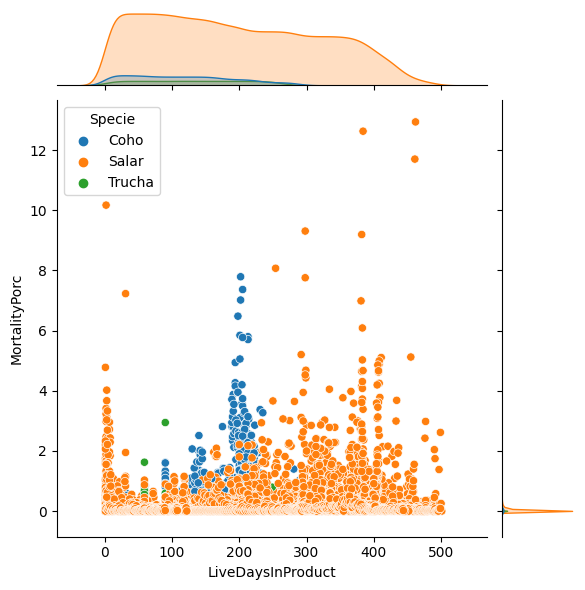

In [37]:
# Este grafico combina Scatter y distribuciones de variables en ambos ejes.
sns.jointplot(data=df, 
              x="LiveDaysInProduct", 
              y="MortalityPorc", 
              hue="Season")

sns.jointplot(data=df, 
              x="LiveDaysInProduct", 
              y="MortalityPorc", 
              hue="Specie")

> Revisamos los tipos de datos para determinar que tipo de encoder ocupar en los datos de tipo **Object**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104849 entries, 0 to 104877
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Specie                             104849 non-null  object        
 1   Barrio                             104849 non-null  int64         
 2   SiteName                           104849 non-null  object        
 3   Latitude                           104849 non-null  float64       
 4   Longditude                         104849 non-null  float64       
 5   ModelName                          104849 non-null  object        
 6   Unit                               104849 non-null  object        
 7   Date                               104849 non-null  datetime64[ns]
 8   Year                               104849 non-null  int64         
 9   Month                              104849 non-null  int64         
 10  Day                 

## Busqueda de correlaciones

> Ver las correlaciones entre variables para eliminar las que tienen alta correlacion / colinealidad.

<Axes: >

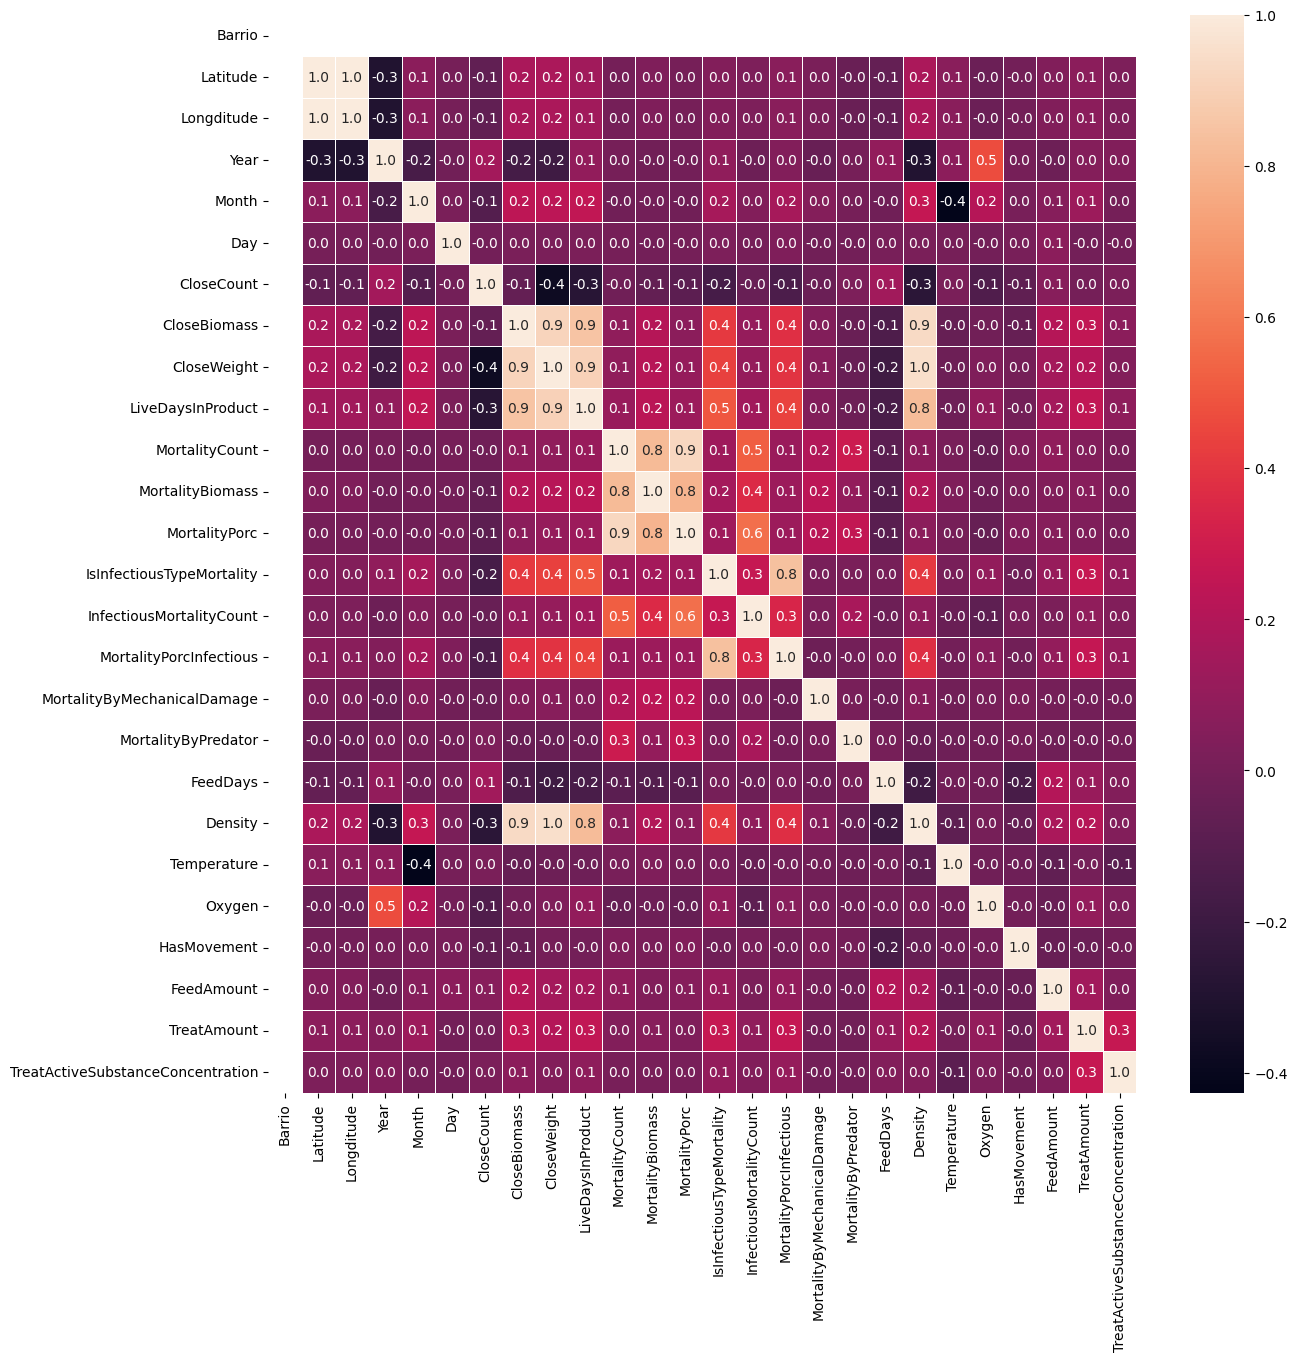

In [39]:
corr = df.corr()
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [40]:
# Se analiza la correlacion de nuestra variable a predecir con el resto de las caracteristicas del set de datos.
corr["MortalityPorc"].sort_values(ascending=False)

MortalityPorc                        1.000000
MortalityCount                       0.927492
MortalityBiomass                     0.794502
InfectiousMortalityCount             0.568494
MortalityByPredator                  0.256382
MortalityByMechanicalDamage          0.227468
IsInfectiousTypeMortality            0.139150
LiveDaysInProduct                    0.129239
MortalityPorcInfectious              0.125473
CloseWeight                          0.105611
Density                              0.074337
CloseBiomass                         0.071090
FeedAmount                           0.053788
HasMovement                          0.041144
TreatAmount                          0.031478
TreatActiveSubstanceConcentration    0.008263
Latitude                             0.007652
Longditude                           0.007652
Temperature                          0.007052
Day                                 -0.001760
Year                                -0.007331
Month                             

<Axes: >

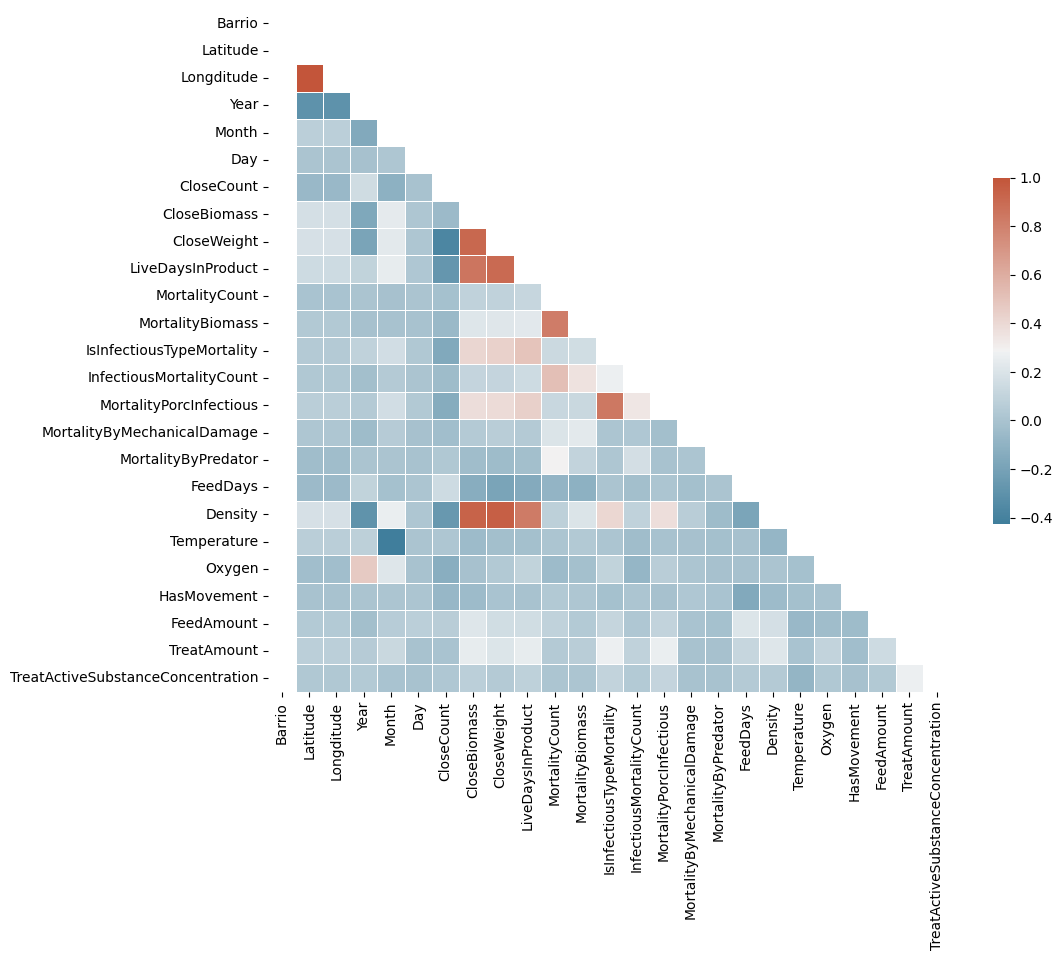

In [41]:
# Otra grafica para representar las correlaciones.
corr = df.set_index('MortalityPorc').corr()
# print(corr)

# Para excluir las correlaciones duplicadas
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Tamaño de la Figura
f, ax = plt.subplots(figsize=(11, 9))

# Generar paleta de color
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Mapa de calor con el Mask correcto
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

> Para la limpieza de datos
Se quitan caracteristicas altamente correlacionadas 
- 'Date'
- 'Unit'
- 'ModelName'
- 'CloseWeight'
- 'MortalityBiomass'
- 'IsInfectiousTypeMortality' 

In [42]:
df.drop(['Date','Unit','ModelName','CloseWeight','MortalityBiomass','IsInfectiousTypeMortality'], axis=1, inplace=True)

Y la variable CloseBiomass, altamente correlacionada

In [43]:
df.drop(['CloseBiomass'], axis=1, inplace=True)

<Axes: >

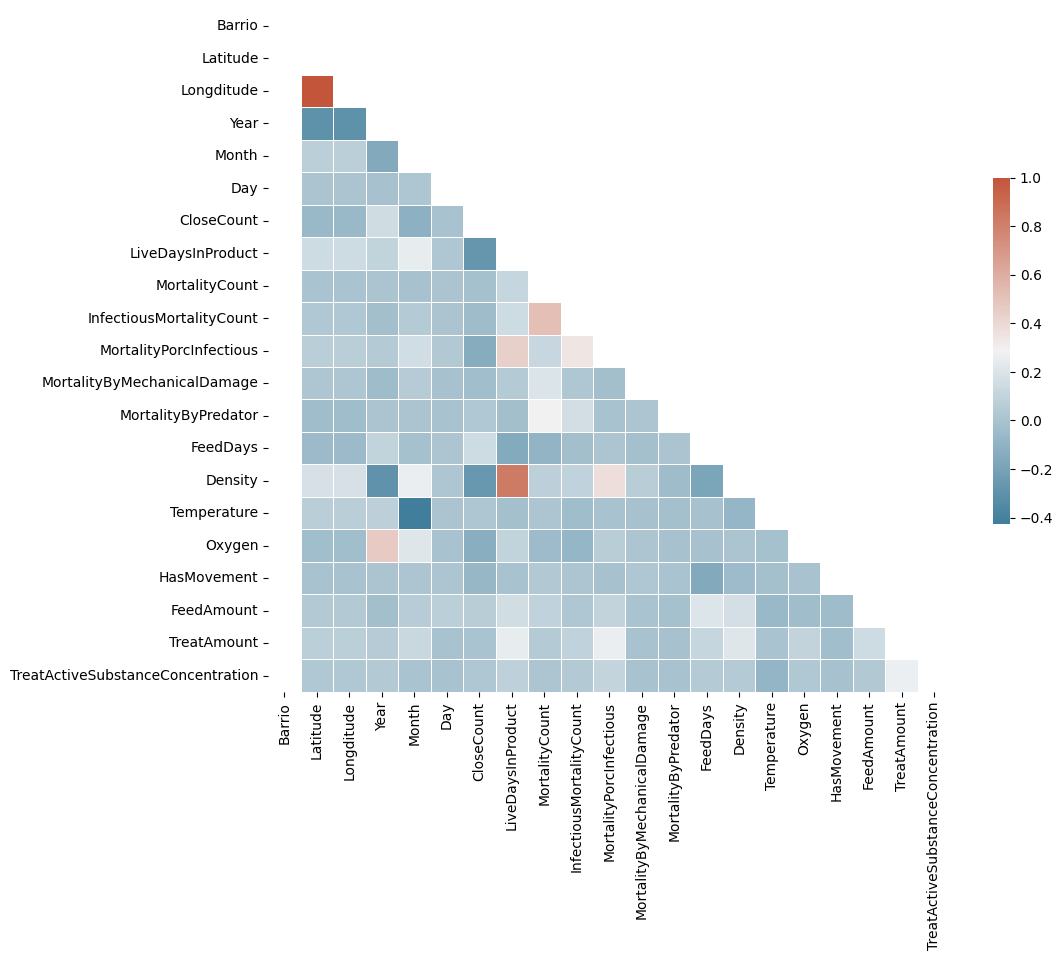

In [44]:
corr = df.set_index('MortalityPorc').corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Tamaño de la Figura
f, ax = plt.subplots(figsize=(11, 9))

# Generar paleta de color
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104849 entries, 0 to 104877
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Specie                             104849 non-null  object  
 1   Barrio                             104849 non-null  int64   
 2   SiteName                           104849 non-null  object  
 3   Latitude                           104849 non-null  float64 
 4   Longditude                         104849 non-null  float64 
 5   Year                               104849 non-null  int64   
 6   Month                              104849 non-null  int64   
 7   Day                                104849 non-null  int64   
 8   Season                             104849 non-null  object  
 9   CloseCount                         104849 non-null  int64   
 10  LiveDaysInProduct                  104849 non-null  int64   
 11  MortalityCount            

# 3 Preparar los datos para algoritmos de machine learning.

Hace one hot encode o transform de 
Specie
Barrio
SiteName
Season
Lostfeed
ActiveSubstance
TreatmentMethod
TreatmenProduct


In [46]:
df.shape

(104849, 30)

In [47]:
# Generamos un recorrido de las variables objects, para visualizar la ocurrencia de sus valores  
for columna in df.select_dtypes(include = object).columns:
    print('\nEstadísticos de la columna: {0}'.format(columna))
    print(df[columna].value_counts())


Estadísticos de la columna: Specie
Salar     92852
Coho       7800
Trucha     4197
Name: Specie, dtype: int64

Estadísticos de la columna: SiteName
Site 1Ma    22539
Site 3Av    20074
Site 6Ca    18884
Site 7Se    13774
Site 2Es    13398
Site 5Ca     6098
Site 9Ha     5099
Site 8La     2864
Site 4Ga     2119
Name: SiteName, dtype: int64

Estadísticos de la columna: Season
Otoño        30487
Verano       30059
Invierno     25217
Primavera    19086
Name: Season, dtype: int64

Estadísticos de la columna: LostFeed
-                                             94690
Environment – Bad weather                      2334
Environment – Low DO                           2036
Biológico - Baño de peces por Caligus          1688
Environment – Plankton/Algae                    744
Operational – Harvest                           732
Technical issues                                359
Technical - Feeding system                      350
Environment – Current                           320
Harvest        

> Realizar un label encoder de las siguientes variables categoricas. Pudiesen ayudar al entrenamiento.
- TreatmentMethod
- ActiveSubstance
- TreatmentProduct
- LiveAgeGroup
- LostFeed

In [48]:
# Se crean los labelencoder
labelencoder = LabelEncoder()
df['LostFeed'] = labelencoder.fit_transform(df['LostFeed'])
df['LiveAgeGroup'] = labelencoder.fit_transform(df['LiveAgeGroup'])
df['TreatmentMethod'] = labelencoder.fit_transform(df['TreatmentMethod'])
df['ActiveSubstance'] = labelencoder.fit_transform(df['ActiveSubstance'])
df['TreatmentProduct'] = labelencoder.fit_transform(df['TreatmentProduct'])
df

Specie  Barrio  SiteName   Latitude  Longditude  Year  Month  Day  \
0        Coho      34  Site 3Av -40.712784  -74.005941  2019      1    1   
1        Coho      34  Site 3Av -40.712784  -74.005941  2019      1    2   
2        Coho      34  Site 3Av -40.712784  -74.005941  2019      1    3   
3        Coho      34  Site 3Av -40.712784  -74.005941  2019      1    4   
4        Coho      34  Site 3Av -40.712784  -74.005941  2019      1    5   
...       ...     ...       ...        ...         ...   ...    ...  ...   
104873  Salar      34  Site 7Se -44.058581  -73.116767  2023      7   12   
104874  Salar      34  Site 7Se -44.058581  -73.116767  2023      7   13   
104875  Salar      34  Site 7Se -44.058581  -73.116767  2023      7   14   
104876  Salar      34  Site 7Se -44.058581  -73.116767  2023      7   15   
104877  Salar      34  Site 7Se -44.058581  -73.116767  2023      7   16   

          Season  CloseCount  ...   Oxygen  HasMovement  LostFeed  FeedAmount  \
0         Verano       54480  ...  10.2625            0         0         0.0   
1         Verano       54480  ...  10.2625            0         0         0.0   
2         Verano       54480  ...  10.2625            0         0         0.0   
3         Verano       54480  ...  10.2625            0         0         0.0   
4         Verano       54480  ...  10.2625            0         0         0.0   
...          ...         ...  ...      ...          ...       ...         ...   
104873  Invierno       43535  ...  90.0000            0         0       355.0   
104874  Invierno       43483  ...  87.0000            0         0       338.0   
104875  Invierno       43483  ...  88.0000            0         0       337.0   
104876  Invierno       43315  ...  89.0000            0         0       503.0   
104877  Invierno       43288  ...  86.0000            0         0       344.0   

        ActiveSubstance  TreatAmount  TreatmentMethod  TreatmentProduct  \
0                     0          0.0                0                 0   
1                     0          0.0                0                 0   
2                     0          0.0                0                 0   
3                     0          0.0                0                 0   
4                     0          0.0                0                 0   
...                 ...          ...              ...               ...   
104873                0          0.0                0                 0   
104874                0          0.0                0                 0   
104875                0          0.0                0                 0   
104876                0          0.0                0                 0   
104877                0          0.0                0                 0   

        TreatActiveSubstanceConcentration  LiveAgeGroup  
0                                     0.0             0  
1                                     0.0             0  
2                                     0.0             0  
3                                     0.0             0  
4                                     0.0             0  
...                                   ...           ...  
104873                                0.0             5  
104874                                0.0             5  
104875                                0.0             5  
104876                                0.0             5  
104877                                0.0             5  

[104849 rows x 30 columns]

In [49]:
# Columnas categoricas y numericas
cat_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = df.select_dtypes(include=['float64', 'int']).columns.to_list()

print('Num Cols ->' + str(numeric_cols))
print('Cat Cols ->' + str(cat_cols))

Num Cols ->['Barrio', 'Latitude', 'Longditude', 'Year', 'Month', 'Day', 'CloseCount', 'LiveDaysInProduct', 'MortalityCount', 'MortalityPorc', 'InfectiousMortalityCount', 'MortalityPorcInfectious', 'MortalityByMechanicalDamage', 'MortalityByPredator', 'FeedDays', 'Density', 'Temperature', 'Oxygen', 'HasMovement', 'LostFeed', 'FeedAmount', 'ActiveSubstance', 'TreatAmount', 'TreatmentMethod', 'TreatmentProduct', 'TreatActiveSubstanceConcentration', 'LiveAgeGroup']
Cat Cols ->['Specie', 'SiteName', 'Season']


In [50]:
cat_columns = df.select_dtypes(include=['object']).columns
cat_columns
df[cat_columns]

Specie  SiteName    Season
0        Coho  Site 3Av    Verano
1        Coho  Site 3Av    Verano
2        Coho  Site 3Av    Verano
3        Coho  Site 3Av    Verano
4        Coho  Site 3Av    Verano
...       ...       ...       ...
104873  Salar  Site 7Se  Invierno
104874  Salar  Site 7Se  Invierno
104875  Salar  Site 7Se  Invierno
104876  Salar  Site 7Se  Invierno
104877  Salar  Site 7Se  Invierno

[104849 rows x 3 columns]

In [51]:
cat_df = df[cat_columns]
encoder = OneHotEncoder()
encoder.fit(cat_df)
cat_encoded = encoder.transform(cat_df).toarray()
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat_columns))
cat_encoded_df

Specie_Coho  Specie_Salar  Specie_Trucha  SiteName_Site 1Ma  \
0               1.0           0.0            0.0                0.0   
1               1.0           0.0            0.0                0.0   
2               1.0           0.0            0.0                0.0   
3               1.0           0.0            0.0                0.0   
4               1.0           0.0            0.0                0.0   
...             ...           ...            ...                ...   
104844          0.0           1.0            0.0                0.0   
104845          0.0           1.0            0.0                0.0   
104846          0.0           1.0            0.0                0.0   
104847          0.0           1.0            0.0                0.0   
104848          0.0           1.0            0.0                0.0   

        SiteName_Site 2Es  SiteName_Site 3Av  SiteName_Site 4Ga  \
0                     0.0                1.0                0.0   
1                     0.0                1.0                0.0   
2                     0.0                1.0                0.0   
3                     0.0                1.0                0.0   
4                     0.0                1.0                0.0   
...                   ...                ...                ...   
104844                0.0                0.0                0.0   
104845                0.0                0.0                0.0   
104846                0.0                0.0                0.0   
104847                0.0                0.0                0.0   
104848                0.0                0.0                0.0   

        SiteName_Site 5Ca  SiteName_Site 6Ca  SiteName_Site 7Se  \
0                     0.0                0.0                0.0   
1                     0.0                0.0                0.0   
2                     0.0                0.0                0.0   
3                     0.0                0.0                0.0   
4                     0.0                0.0                0.0   
...                   ...                ...                ...   
104844                0.0                0.0                1.0   
104845                0.0                0.0                1.0   
104846                0.0                0.0                1.0   
104847                0.0                0.0                1.0   
104848                0.0                0.0                1.0   

        SiteName_Site 8La  SiteName_Site 9Ha  Season_Invierno  Season_Otoño  \
0                     0.0                0.0              0.0           0.0   
1                     0.0                0.0              0.0           0.0   
2                     0.0                0.0              0.0           0.0   
3                     0.0                0.0              0.0           0.0   
4                     0.0                0.0              0.0           0.0   
...                   ...                ...              ...           ...   
104844                0.0                0.0              1.0           0.0   
104845                0.0                0.0              1.0           0.0   
104846                0.0                0.0              1.0           0.0   
104847                0.0                0.0              1.0           0.0   
104848                0.0                0.0              1.0           0.0   

        Season_Primavera  Season_Verano  
0                    0.0            1.0  
1                    0.0            1.0  
2                    0.0            1.0  
3                    0.0            1.0  
4                    0.0            1.0  
...                  ...            ...  
104844               0.0            0.0  
104845               0.0            0.0  
104846               0.0            0.0  
104847               0.0            0.0  
104848               0.0            0.0  

[104849 rows x 16 columns]

In [52]:
df_encoded = pd.concat([df, cat_encoded_df], axis=1)

In [53]:
df_encoded.drop(cat_columns, axis=1, inplace=True)

In [54]:
df =df_encoded

In [55]:
print(df.shape)

(104878, 43)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104878 entries, 0 to 102523
Data columns (total 43 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Barrio                             104849 non-null  float64
 1   Latitude                           104849 non-null  float64
 2   Longditude                         104849 non-null  float64
 3   Year                               104849 non-null  float64
 4   Month                              104849 non-null  float64
 5   Day                                104849 non-null  float64
 6   CloseCount                         104849 non-null  float64
 7   LiveDaysInProduct                  104849 non-null  float64
 8   MortalityCount                     104849 non-null  float64
 9   MortalityPorc                      104849 non-null  float64
 10  InfectiousMortalityCount           104849 non-null  float64
 11  MortalityPorcInfectious            1048

In [57]:
df=df.dropna()
df.shape
# con la encodificacion aparecieron valores 58 row nulos.

(104820, 43)

In [58]:
df.isna().sum()

Barrio                               0
Latitude                             0
Longditude                           0
Year                                 0
Month                                0
Day                                  0
CloseCount                           0
LiveDaysInProduct                    0
MortalityCount                       0
MortalityPorc                        0
InfectiousMortalityCount             0
MortalityPorcInfectious              0
MortalityByMechanicalDamage          0
MortalityByPredator                  0
FeedDays                             0
Density                              0
Temperature                          0
Oxygen                               0
HasMovement                          0
LostFeed                             0
FeedAmount                           0
ActiveSubstance                      0
TreatAmount                          0
TreatmentMethod                      0
TreatmentProduct                     0
TreatActiveSubstanceConce

#### Test de Shaporiwill, eterocidasticidad, Breusch-Pagan

In [59]:
# Perform the Shapiro-Wilk test
from scipy import stats 
stat, pvalue = stats.shapiro(df)

# Print the results
print('Shapiro-Wilk test statistic:', stat)
print('Shapiro-Wilk p-value:', pvalue)

Shapiro-Wilk test statistic: 0.013821899890899658
Shapiro-Wilk p-value: 0.0


In [60]:
# Test de D'Agostino-Pearson 
statistic, p_value = stats.normaltest(df['MortalityPorc']) 
print("Estadístico:", statistic) 
print("Valor p:", p_value)
 

Estadístico: 229820.14980707463
Valor p: 0.0


### Se separa la variable a buscar MortalityPorc

In [61]:
X=df.drop(columns = 'MortalityPorc')
y=df['MortalityPorc']

### Analizamos algunas variables, para ver si existe alguna linealidad

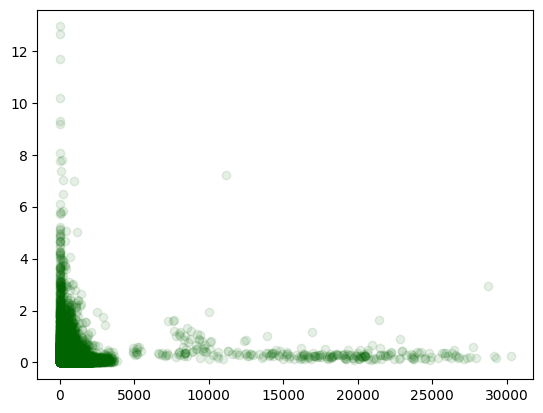

In [62]:
plt.scatter(X['FeedAmount'],y,color='darkgreen', label="MortalityPorc",alpha=.1)

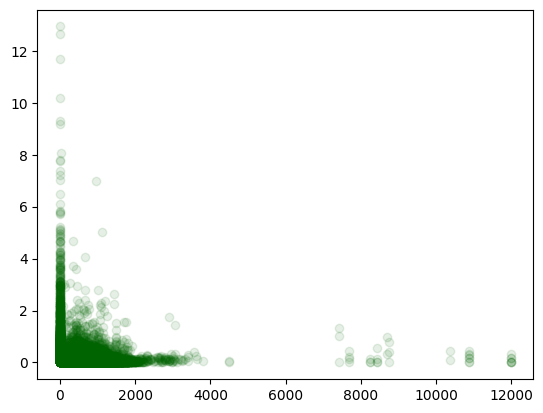

In [63]:
plt.scatter(X['TreatAmount'],y,color='darkgreen', label="MortalityPorc",alpha=.1)

In [64]:
X.shape, y.shape

((104820, 42), (104820,))

## Division de los datos de entrenamiento y prueba

### Se realiza una prueba con regresion lineal para ver si los otros modelos mejoran estadisticas 

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                        y,
                                        random_state = 456,
                                        test_size=0.2
                                    )
print('Una vez trabajado el dataset, es posible dividir el data set en train y test. El test size corresponde:')
print('--------------------------------------------')
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Una vez trabajado el dataset, es posible dividir el data set en train y test. El test size corresponde:
--------------------------------------------
X_train: (83856, 42)
X_test: (20964, 42)
y_train: (83856,)
y_test: (20964,)


In [ ]:
# -----prueba con una regresion lineal

In [66]:
from math import sqrt
# Fit a regresion lineal para probar 
model = LinearRegression()
model.fit(X_train, y_train)
# hacer predicciones
y_pred = model.predict(X_train)

# Evaluar el modelo
print('R^2 entrenamiento :', model.score(X_train, y_train))
print('R^2 test :', model.score(X_test , y_test))



R^2 entrenamiento : 0.8597356710231745
R^2 test : 0.937102631500798


# 4 Seleccionar un modelo y entrenarlo

In [107]:
# Escalar los datos (es importante en redes neuronales)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train ->',X_train.shape)
print('y_train->', y_train.shape)

print('X_test ->',X_test.shape)
print('y_test ->', y_test.shape)

print('X ->',X.shape)
print('y ->',y.shape)

X_train -> (83856, 42)
y_train-> (83856,)
X_test -> (20964, 42)
y_test -> (20964,)
X -> (104820, 42)
y -> (104820,)


In [108]:
# Modelo de Regresión Lineal
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
y_pred_lin = reg_lin.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# Obtener la importancia de las variables en el modelo de regresión lineal
lin_coefs = reg_lin.coef_
lin_score = reg_lin.score(X_test,y_test)

In [109]:
# Modelo de Random Forest
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Obtener la importancia de las variables y accuracy en el modelo de Random Forest
rf_importances = rf.feature_importances_
rf_score = rf.score(X_test,y_test)

In [110]:
print(mse_rf)
print(r2_score(y_test, y_pred_rf))

0.004453877846070508
0.8828866547645308


In [239]:
# Modelo de XGBoost
xgb = XGBRegressor(n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# Obtener la importancia de las variables en el modelo de XGBoost
xgb_importances = xgb.feature_importances_
xgb_score = xgb.score(X_test,y_test)

In [164]:
print(mse_xgb)
print(r2_score(y_test, y_pred_xgb))

0.00689006213495304
0.8188279397432277


In [219]:
# Modelo red lstm

# Convertir los datos a la forma adecuada para LSTM (número de muestras, número de pasos de tiempo, número de características)
n_timesteps, n_features = X_train.shape[0], X_train.shape[1]
X_train_lstm = X_train.reshape((n_timesteps, 1, n_features))
n_timesteps, n_features = X_test.shape[0], X_test.shape[1]
X_test_lstm = X_test.reshape((n_timesteps, 1, n_features))

# Crear el modelo LSTM
lstm = Sequential()
lstm.add(LSTM(50, activation='relu', input_shape=(1, n_features)))  # Ajustar la forma de entrada
lstm.add(Dense(1))  # Capa de salida con una neurona para regresión
lstm.compile(optimizer='adam', loss='mse')  # Compilación del modelo

# Agregar el callback EarlyStopping para detener el entrenamiento si no hay mejora en la función de pérdida si no se observa una mejora en la pérdida en el conjunto de validación durante 10 épocas consecutivas.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con el callback EarlyStopping
lstm.fit(X_train_lstm, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Realizar predicciones en el conjunto de prueba
y_pred_lstm = lstm.predict(X_test_lstm).flatten()

# Calcular las métricas de evaluación
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error (MSE):", mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)

Epoch 1/100
4193/4193 [==============================] - 22s 5ms/step - loss: 0.0272 - val_loss: 0.0074
Epoch 2/100
4193/4193 [==============================] - 22s 5ms/step - loss: 0.0085 - val_loss: 0.0071
Epoch 3/100
4193/4193 [==============================] - 22s 5ms/step - loss: 0.0056 - val_loss: 0.0021
Epoch 4/100
4193/4193 [==============================] - 23s 5ms/step - loss: 0.0050 - val_loss: 0.0016
Epoch 5/100
4193/4193 [==============================] - 16s 4ms/step - loss: 0.0044 - val_loss: 0.0021
Epoch 6/100
4193/4193 [==============================] - 17s 4ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 7/100
4193/4193 [==============================] - 16s 4ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 8/100
4193/4193 [==============================] - 18s 4ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 9/100
4193/4193 [==============================] - 20s 5ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 10/100
4193/4193 [==============================] - 22s 5m

In [248]:
lstm.summary()  

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50)                18600     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 18,651
Trainable params: 18,651
Non-trainable params: 0
_________________________________________________________________


In [249]:
# Comparar los errores cuadráticos medios de los modelos
modelos = ['Regresión Lineal', 'Random Forest', 'XGBoost', 'Red Neuronal LSTM']
mses = [mse_lin, mse_rf, mse_xgb, mse_lstm]
mejor_modelo = modelos[np.argmin(mses)]
mejor_mse = np.min(mses)

print(f"El mejor modelo es: {mejor_modelo}")
print(f"Error cuadrático medio: {mejor_mse}")

El mejor modelo es: Random Forest
Error cuadrático medio: 0.0051123853131813555


In [250]:
# DataFrame con las importancias de las variables para cada modelo
importance_df = pd.DataFrame({
    'Variable': df.drop(columns = 'MortalityPorc').columns,
    'Regresión Lineal': lin_coefs,
    'Random Forest': rf_importances,
    'XGBoost': xgb_importances,
    'Red Neuronal LSTM': lstm_importances
})

In [243]:
importance_df

Variable  Regresión Lineal  Random Forest  \
0                              Barrio     -2.022159e+06   0.000000e+00   
1                            Latitude     -5.572651e+04   6.484821e-06   
2                          Longditude      5.572648e+04   5.173518e-06   
3                                Year     -2.007972e-02   1.594063e-04   
4                               Month     -6.778475e-03   4.403962e-04   
5                                 Day     -1.553435e-03   1.148590e-03   
6                          CloseCount     -1.302354e-01   9.267567e-02   
7                   LiveDaysInProduct      6.529899e-02   2.847644e-03   
8                      MortalityCount      1.266141e+01   8.921108e-01   
9            InfectiousMortalityCount      1.802202e+00   9.616046e-04   
10            MortalityPorcInfectious     -2.720407e-02   5.312144e-04   
11        MortalityByMechanicalDamage      6.911754e-01   2.020519e-05   
12                MortalityByPredator     -2.157560e-01   4.793913e-04   
13                           FeedDays      4.992883e-03   2.774607e-04   
14                            Density     -6.687743e-02   1.359883e-03   
15                        Temperature     -1.771586e-02   7.950946e-04   
16                             Oxygen     -1.783254e-02   1.396953e-03   
17                        HasMovement     -2.459290e-02   2.816576e-04   
18                           LostFeed      1.203877e-02   1.493672e-03   
19                         FeedAmount     -9.546386e-02   8.270334e-04   
20                    ActiveSubstance     -1.752697e-02   4.069363e-05   
21                        TreatAmount     -5.589372e-02   4.887782e-05   
22                    TreatmentMethod      1.835791e-02   1.751495e-05   
23                   TreatmentProduct      4.405857e-03   7.807257e-06   
24  TreatActiveSubstanceConcentration      4.432057e-03   2.819148e-05   
25                       LiveAgeGroup      4.523319e-04   2.696977e-04   
26                        Specie_Coho     -3.759130e+11   4.894706e-05   
27                       Specie_Salar     -3.759130e+11   2.580540e-05   
28                      Specie_Trucha     -3.759130e+11   2.829159e-06   
29                  SiteName_Site 1Ma      7.270250e+10   8.295382e-05   
30                  SiteName_Site 2Es      7.270250e+10   5.696486e-05   
31                  SiteName_Site 3Av      7.270250e+10   1.036851e-04   
32                  SiteName_Site 4Ga      7.270250e+10   1.727739e-07   
33                  SiteName_Site 5Ca      7.270250e+10   7.968125e-04   
34                  SiteName_Site 6Ca      7.270250e+10   1.364342e-04   
35                  SiteName_Site 7Se      7.270250e+10   1.044265e-04   
36                  SiteName_Site 8La      7.270250e+10   4.316124e-06   
37                  SiteName_Site 9Ha      7.270250e+10   1.815887e-06   
38                    Season_Invierno      1.996788e+11   2.301331e-05   
39                       Season_Otoño      1.996788e+11   2.754086e-04   
40                   Season_Primavera      1.996788e+11   1.079717e-05   
41                      Season_Verano      1.996788e+11   9.448862e-05   

     XGBoost  Red Neuronal LSTM  
0   0.000000          -1.703160  
1   0.006624         -17.171579  
2   0.000000         -12.529095  
3   0.000189         -16.854931  
4   0.002422         -30.090969  
5   0.000654         -43.818970  
6   0.080562        -317.641418  
7   0.003788          32.679646  
8   0.862523        -152.690857  
9   0.001621          19.175430  
10  0.000799         -48.732254  
11  0.003746          63.742798  
12  0.000245          45.255348  
13  0.001605         -34.388851  
14  0.001193         -98.778206  
15  0.003833           0.825869  
16  0.001563         -40.676575  
17  0.007904         -95.535156  
18  0.000768          -5.379694  
19  0.000392         -60.262589  
20  0.000451         -21.399998  
21  0.001269           7.174079  
22  0.000000         -31.514111  
23  0.000000         -22.69039

In [ ]:
# Graficar las importancias de las variables con Seaborn 
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Variable', y='Regresión Lineal', color='blue', alpha=0.5, label='Regresión Lineal')
sns.barplot(data=importance_df, x='Variable', y='Random Forest', color='green', alpha=0.5, label='Random Forest')
sns.barplot(data=importance_df, x='Variable', y='XGBoost', color='orange', alpha=0.5, label='XGBoost')
#sns.barplot(data=importance_df, x='Variable', y='Red Neuronal LSTM', color='red', alpha=0.5, label='Red Neuronal LSTM')
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en los modelos')
plt.legend()
plt.show()

In [254]:
# Calcular medidas de evaluación y confeccion de dataframe para muestra y grafico de estas
mae_lin0 = mean_absolute_error(y_test, y_pred_lin)
r2_lin0 = r2_score(y_test, y_pred_lin)
mse_lin0 = mean_squared_error(y_test, y_pred_lin)
rmse_lin0 = sqrt(mse_lin0)
f1_lin0 = f1_score(y_test > 0.5, y_pred_lin > 0.5)

mae_rf0 = mean_absolute_error(y_test, y_pred_rf)
r2_rf0 = r2_score(y_test, y_pred_rf)
mse_rf0 = mean_squared_error(y_test, y_pred_rf)
rmse_rf0 = sqrt(mse_rf0)
f1_rf0 = f1_score(y_test > 0.5, y_pred_rf > 0.5)

mae_xgb0 = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb0 = r2_score(y_test, y_pred_xgb)
mse_xgb0 = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb0 = sqrt(mse_xgb0)
f1_xgb0 = f1_score(y_test > 0.5, y_pred_xgb > 0.5)

mae_lstm0 = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm0 = r2_score(y_test, y_pred_lstm)
mse_lstm0 = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm0 = sqrt(mse_lstm0)
f1_lstm0 = f1_score(y_test > 0.5, y_pred_lstm > 0.5)

# Crear un DataFrame con las medidas de evaluación
evaluations_df0 = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'XGBoost', 'LSTM'],
    'MAE': [mae_lin0, mae_rf0, mae_xgb0, mae_lstm0],
    'R-squared': [r2_lin0, r2_rf0, r2_xgb0, r2_lstm0],
    'MSE': [mse_lin0, mse_rf0, mse_xgb0, mse_lstm0],
    'RMSE': [rmse_lin0, rmse_rf0, rmse_xgb0, rmse_lstm0],
    #'F1-score': [f1_lin, f1_rf, f1_xgb, f1_lstm]
})

In [297]:
evaluations_df0

Modelo       MAE  R-squared       MSE      RMSE
0  Regresión Lineal  0.015414   0.768466  0.008805  0.093837
1     Random Forest  0.001809   0.865571  0.005112  0.071501
2           XGBoost  0.002677   0.829600  0.006480  0.080501
3              LSTM  0.011342   0.840556  0.006064  0.077870

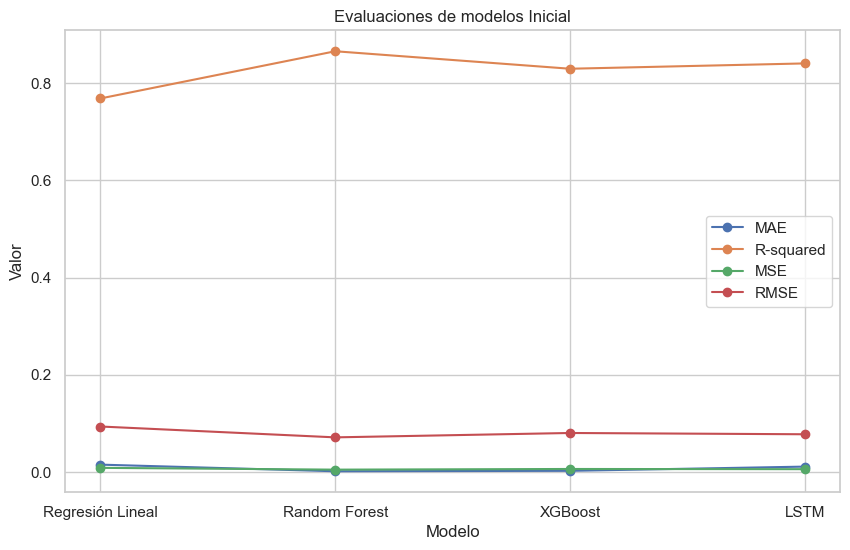

In [298]:
# Variables para el gráfico
modelos = evaluations_df0['Modelo']
metricas = ['MAE', 'R-squared', 'MSE', 'RMSE']
plt.figure(figsize=(10, 6))

# Graficar cada métrica para los diferentes modelos
for metrica in metricas:
    valores_metrica = evaluations_df0[metrica]
    plt.plot(modelos, valores_metrica, marker='o', label=metrica)

plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.title('Evaluaciones de modelos Inicial')
plt.legend()
plt.show()

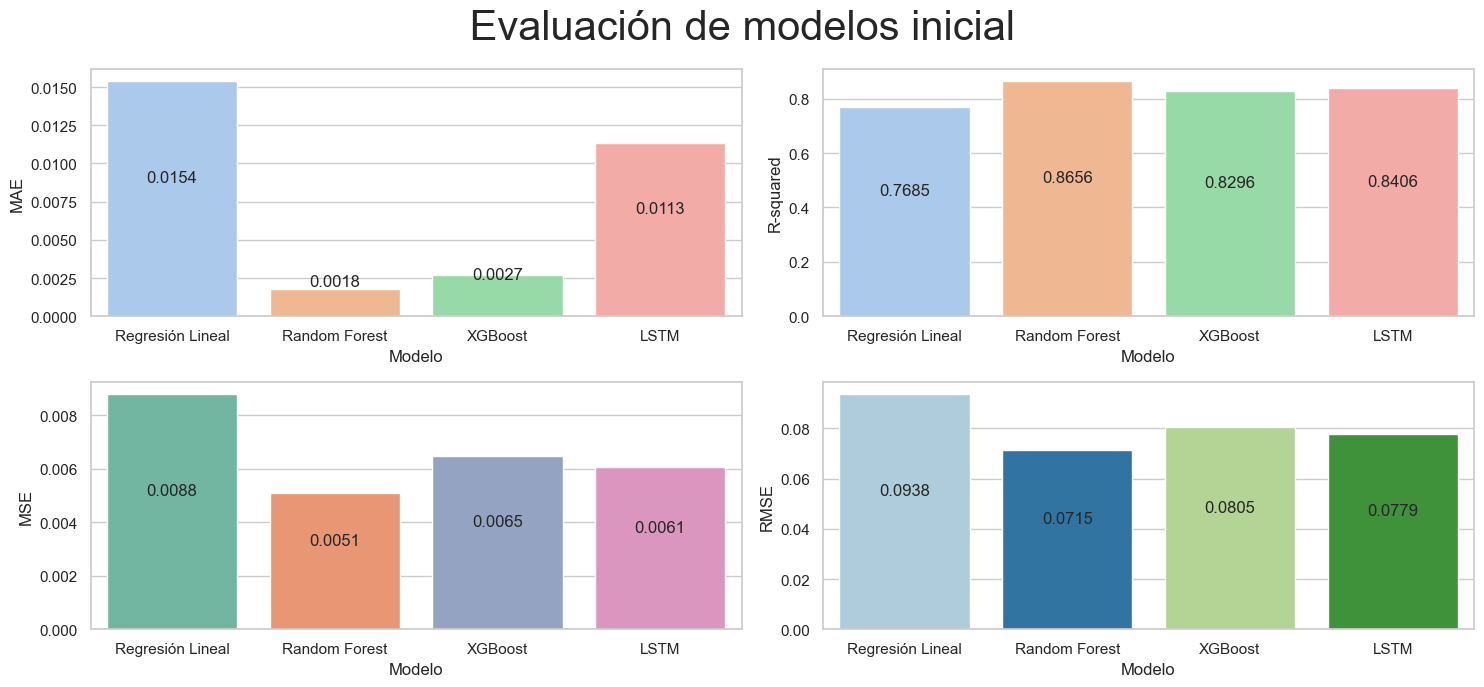

In [299]:
 # Graficar las medidas de evaluación 
sns.set(style="whitegrid")
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15, 7))
ax = ax.flat

barchart = sns.barplot(x='Modelo', y='MAE', data=evaluations_df0, ax=ax[0],palette="pastel")
barchart.bar_label(ax[0].containers[0], label_type='center', padding=15, fmt='%.4f')

barchart = sns.barplot(x='Modelo', y='R-squared', data=evaluations_df0, ax=ax[1], palette="pastel")
barchart.bar_label(ax[1].containers[0], label_type='center', padding=15, fmt='%.4f')
 
barchart = sns.barplot(x='Modelo', y='MSE', data=evaluations_df0, ax=ax[2], palette="Set2")
barchart.bar_label(ax[2].containers[0], label_type='center', padding=15, fmt='%.4f')
 
barchart = sns.barplot(x='Modelo', y='RMSE', data=evaluations_df0, ax=ax[3], palette="Paired")
barchart.bar_label(ax[3].containers[0], label_type='center', padding=15, fmt='%.4f')
 
fig.suptitle(' Evaluación de modelos inicial ', fontsize=30)
fig.tight_layout()

In [273]:
#importancia de las caracteristicas para XgBoost
indices = np.argsort(xgb_importances)[::-1]
df.drop(columns = 'MortalityPorc').columns[[indices[:12]]].tolist()

[['MortalityCount',
  'CloseCount',
  'SiteName_Site 5Ca',
  'HasMovement',
  'Latitude',
  'Temperature',
  'LiveDaysInProduct',
  'MortalityByMechanicalDamage',
  'Month',
  'InfectiousMortalityCount',
  'FeedDays',
  'Oxygen']]

In [274]:
#importancia de las caracteristicas para RandomForest
indices = np.argsort(rf_importances)[::-1]
df.drop(columns = 'MortalityPorc').columns[[indices[:12]]].tolist()

[['MortalityCount',
  'CloseCount',
  'LiveDaysInProduct',
  'LostFeed',
  'Oxygen',
  'Density',
  'Day',
  'InfectiousMortalityCount',
  'FeedAmount',
  'SiteName_Site 5Ca',
  'Temperature',
  'MortalityPorcInfectious']]

In [279]:
lstm_weights = lstm.layers[0].get_weights()[0]
lstm_importances = np.mean(np.abs(lstm_weights), axis=1)
lstm_importances
indices_sorted = np.argsort(lstm_importances)[::-1]
for i in indices_sorted:
    print(f"Característica {i+1}: {lstm_importances[i]}")

Característica 9: 1.4388668537139893
Característica 7: 0.4602334499359131
Característica 10: 0.38667115569114685
Característica 20: 0.27333664894104004
Característica 34: 0.2509436011314392
Característica 13: 0.2384970784187317
Característica 8: 0.19716514647006989
Característica 15: 0.19641567766666412
Característica 12: 0.1911652684211731
Característica 29: 0.172745019197464
Característica 11: 0.1703319400548935
Característica 18: 0.16871631145477295
Característica 31: 0.1632654219865799
Característica 37: 0.1615433245897293
Característica 38: 0.14860644936561584
Característica 36: 0.1392819732427597
Característica 14: 0.1392478197813034
Característica 17: 0.13867762684822083
Característica 6: 0.13740050792694092
Característica 19: 0.1371528059244156
Característica 26: 0.13540081679821014
Característica 22: 0.1343328356742859
Característica 27: 0.13264907896518707
Característica 30: 0.1319403350353241
Característica 33: 0.13140012323856354
Característica 32: 0.13129670917987823
Carac

## Busqueda / optimización de hiperparametros

#### **Grid search**

Aunque el análisis individual de los hiperparámetros es útil para entender su impacto en el modelo e identificar rangos de interés, la búsqueda final no debe hacerse de forma secuencial, ya que cada hiperparámetro interacciona con los demás. Es preferible recurrir a grid search o random search para analizar varias combinaciones de hiperparámetros. Puede encontrarse más información sobre las estrategias de búsqueda en Machine learning con Python y Scikit-learn.

In [280]:
from sklearn.model_selection import train_test_split, GridSearchCV
import multiprocessing

In [281]:
# Modelo de Random Forest
rf = RandomForestRegressor(n_jobs=-1)
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error',n_jobs=multiprocessing.cpu_count() -1)
grid_search_rf.fit(X_train, y_train)
rf_best = grid_search_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print (grid_search_rf.score)        
print(grid_search_rf.best_params_, ":", grid_search_rf.best_score_, grid_search_rf.scoring)


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=3,
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')>
{'max_depth': None, 'n_estimators': 100} : -0.0020561870018588305 neg_mean_squared_error


In [282]:
# Modelo de Random Forest con hiperparametros sugeridos {'max_depth': None, 'n_estimators': 100}

rf = RandomForestRegressor(n_jobs=-1)  # Utilizar todos los núcleos del procesador
param_grid_rf = {'n_estimators': [100], 'max_depth': [None], 'min_samples_split': [5]}
grid_search_rf_op = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf_op.fit(X_train, y_train)
rf_best_op = grid_search_rf_op.best_estimator_
y_pred_rf_op = rf_best_op.predict(X_test)

In [283]:
# Modelo de XGBoost
xgb = XGBRegressor()
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=multiprocessing.cpu_count() -1)
grid_search_xgb.fit(X_train, y_train)
xgb_best = grid_search_xgb.best_estimator_
y_pred_xgb = xgb_best.predict(X_test) 

print (grid_search_xgb.score)        
print(grid_search_xgb.best_params_, ":", grid_search_xgb.best_score_, grid_search_xgb.scoring)

<bound method BaseSearchCV.score of GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                  

In [284]:
# Modelo de XGBoost con hiperparametros sugeridos {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

xgb = XGBRegressor(n_jobs=-1)  # Utilizar todos los núcleos del procesador
param_grid_xgb = {'n_estimators': [300], 'max_depth': [3], 'learning_rate': [0.1]}
grid_search_xgb_op = GridSearchCV(xgb, param_grid_xgb , cv=5, scoring='neg_mean_squared_error')
grid_search_xgb_op.fit(X_train, y_train)
xgb_best_op = grid_search_xgb_op.best_estimator_
y_pred_xgb_op = xgb_best_op.predict(X_test)

In [117]:
# Modelo LSTM con optimizacion de hyperparametros
#
# # Convertir los datos a la forma adecuada para LSTM (número de muestras, número de pasos de tiempo, número de características)
n_timesteps, n_features = X_train.shape[0], X_train.shape[1]
X_train_lstm = X_train.reshape((n_timesteps, 1, n_features))
n_timesteps, n_features = X_test.shape[0], X_test.shape[1]
X_test_lstm = X_test.reshape((n_timesteps, 1, n_features))

# Crear una función para construir el modelo LSTM
def create_lstm_model(units=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(1, n_features)))
    model.add(Dense(1))  # Capa de salida con una neurona para regresión
    model.compile(optimizer=optimizer, loss='mse')  # Compilación del modelo
    return model

# Convertir el modelo Keras a un estimador de Scikit-learn
regressor = KerasRegressor(build_fn=create_lstm_model, verbose=1)

# Definir los hiperparámetros que queremos optimizar, incluyendo el optimizer
param_grid = {
    'units': [20, 50, 100],   # Número de unidades LSTM
    'batch_size': [8, 16, 32],  # Tamaño del lote (batch size)
    'epochs': [50, 100, 150],  # Número de épocas de entrenamiento
    'optimizer': ['adam', 'rmsprop', 'sgd']  # Funciones de optimización a probar
}

# Definir la métrica a optimizar (en este caso usaremos el MAE)
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

# El callback EarlyStopping para detener el entrenamiento si no hay mejora en la función de pérdida si no se observa una mejora en la pérdida en el conjunto de validación durante 10 épocas consecutivas.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Realizar la búsqueda en cuadrícula (GridSearchCV) con el callback EarlyStopping
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring=scoring, cv=3, verbose=1)
grid_result = grid.fit(X_train_lstm, y_train, callbacks=[early_stopping], validation_data=(X_test_lstm, y_test))


# Imprimir los resultados de la búsqueda en cuadrícula
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# Obtener el mejor modelo
best_model = grid_result.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred_lstm_op = best_model.predict(X_test_lstm).flatten()

# Calcular las métricas de evaluación utilizando el mejor modelo
mae = mean_absolute_error(y_test, y_pred_lstm_op)
mse = mean_squared_error(y_test, y_pred_lstm_op)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Epoch 1/50
6988/6988 [==============================] - 20s 3ms/step - loss: 0.0216 - val_loss: 0.0129
Epoch 2/50
6988/6988 [==============================] - 19s 3ms/step - loss: 0.0067 - val_loss: 0.0097
Epoch 3/50
6988/6988 [==============================] - 18s 3ms/step - loss: 0.0042 - val_loss: 0.0090
Epoch 4/50
6988/6988 [==============================] - 20s 3ms/step - loss: 0.0037 - val_loss: 0.0090
Epoch 5/50
6988/6988 [==============================] - 19s 3ms/step - loss: 0.0034 - val_loss: 0.0089
Epoch 6/50
6988/6988 [==============================] - 21s 3ms/step - loss: 0.0032 - val_loss: 0.0094
Epoch 7/50
6988/6988 [==============================] - 16s 2ms/step - loss: 0.0028 - val_loss: 0.0087
Epoch 8/50
6988/6988 [==============================] - 16s 2ms/step - loss: 0.0025 - val_loss: 0.0115
Epoch 9/50
6988/6988 [==============================] - 17s 3ms/step - loss: 0.0023 - val_loss: 0.0083
Epoch 10/50

### Medidas de evaluacion despues de optimización de hiperparametros 

In [293]:
# Calcular medidas de evaluación
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = sqrt(mse_lin)
f1_lin = f1_score(y_test > 0.5, y_pred_lin > 0.5)

mae_rf = mean_absolute_error(y_test, y_pred_rf_op)
r2_rf = r2_score(y_test, y_pred_rf_op)
mse_rf = mean_squared_error(y_test, y_pred_rf_op)
rmse_rf = sqrt(mse_rf)
f1_rf = f1_score(y_test > 0.5, y_pred_rf_op > 0.5)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb_op)
r2_xgb = r2_score(y_test, y_pred_xgb_op)
mse_xgb = mean_squared_error(y_test, y_pred_xgb_op)
rmse_xgb = sqrt(mse_xgb)
f1_xgb = f1_score(y_test > 0.5, y_pred_xgb > 0.5)

mae_lstm = mean_absolute_error(y_test, y_pred_lstm_op)
r2_lstm = r2_score(y_test, y_pred_lstm_op)
mse_lstm = mean_squared_error(y_test, y_pred_lstm_op)
rmse_lstm = sqrt(mse_lstm)
f1_lstm = f1_score(y_test > 0.5, y_pred_lstm_op > 0.5)

# Crear un DataFrame con las medidas de evaluación
evaluations_df = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'XGBoost', 'LSTM'],
    'MAE': [mae_lin, mae_rf, mae_xgb, mae_lstm],
    'R-squared': [r2_lin, r2_rf, r2_xgb, r2_lstm],
    'MSE': [mse_lin, mse_rf, mse_xgb, mse_lstm],
    'RMSE': [rmse_lin, rmse_rf, rmse_xgb, rmse_lstm],
    #'F1-score': [f1_lin, f1_rf, f1_xgb, f1_lstm]
})

In [294]:
evaluations_df

Modelo       MAE  R-squared       MSE      RMSE
0  Regresión Lineal  0.015414   0.768466  0.008805  0.093837
1     Random Forest  0.001838   0.868469  0.005002  0.070726
2           XGBoost  0.003577   0.849812  0.005712  0.075576
3              LSTM  0.012936   0.805939  0.007380  0.085908

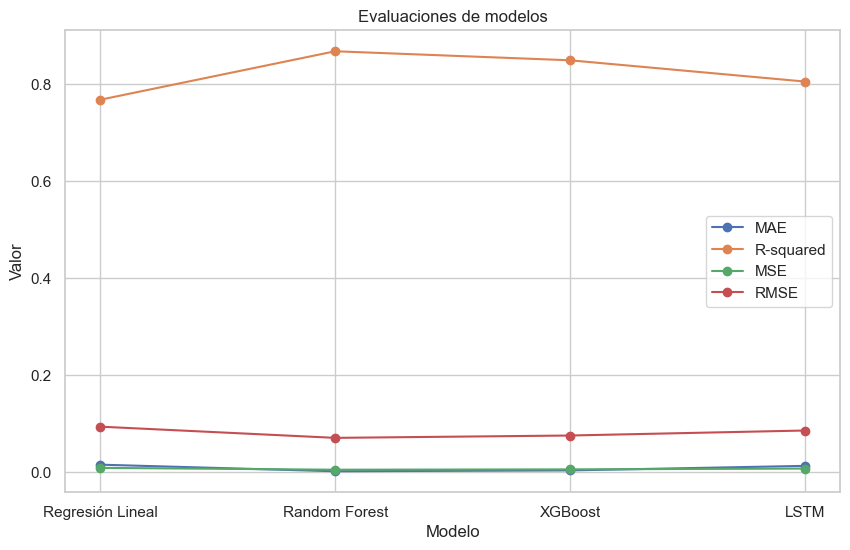

             Modelo       MAE  R-squared       MSE      RMSE
0  Regresión Lineal  0.015414   0.768466  0.008805  0.093837
1     Random Forest  0.001838   0.868469  0.005002  0.070726
2           XGBoost  0.003577   0.849812  0.005712  0.075576
3              LSTM  0.012936   0.805939  0.007380  0.085908
Mejores parámetros para Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Mejores parámetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Mejores parámetros para LSTM: {'units': 100, 'dropout': 0.2, 'optimizer': 'adam'}


In [295]:
# Variables para el gráfico
modelos = evaluations_df['Modelo']
metricas = ['MAE', 'R-squared', 'MSE', 'RMSE']
plt.figure(figsize=(10, 6))

# Graficar cada métrica para los diferentes modelos
for metrica in metricas:
    valores_metrica = evaluations_df[metrica]
    plt.plot(modelos, valores_metrica, marker='o', label=metrica)

plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.title('Evaluaciones de modelos')
plt.legend()
plt.show()

# Imprimir las medidas de evaluación
print(evaluations_df)

# Imprimir los mejores parámetros encontrados para Random Forest y XGBoost
print("Mejores parámetros para Random Forest:", grid_search_rf_op.best_params_)
print("Mejores parámetros para XGBoost:", grid_search_xgb_op.best_params_)
print("Mejores parámetros para LSTM:", {'units': units, 'dropout': dropout, 'optimizer': optimizer})


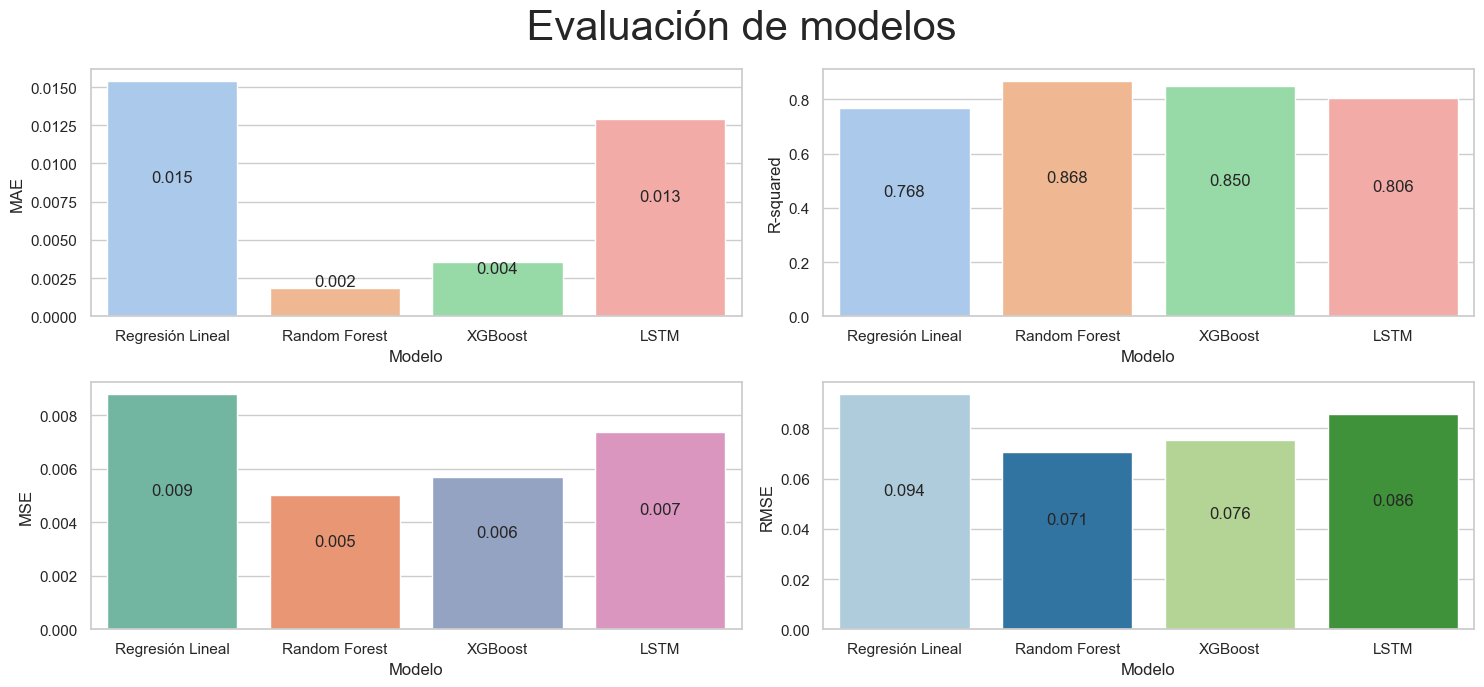

In [296]:

 # Graficar las medidas de evaluación 
sns.set(style="whitegrid")
 
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15, 7))
ax = ax.flat

barchart = sns.barplot(x='Modelo', y='MAE', data=evaluations_df, ax=ax[0],palette="pastel")
barchart.bar_label(ax[0].containers[0], label_type='center', padding=15, fmt='%.3f')
 
barchart = sns.barplot(x='Modelo', y='R-squared', data=evaluations_df, ax=ax[1], palette="pastel")
barchart.bar_label(ax[1].containers[0], label_type='center', padding=15, fmt='%.3f')
 
barchart = sns.barplot(x='Modelo', y='MSE', data=evaluations_df, ax=ax[2], palette="Set2")
barchart.bar_label(ax[2].containers[0], label_type='center', padding=15, fmt='%.3f')
 
barchart = sns.barplot(x='Modelo', y='RMSE', data=evaluations_df, ax=ax[3], palette="Paired")
barchart.bar_label(ax[3].containers[0], label_type='center', padding=15, fmt='%.3f')
 
fig.suptitle(' Evaluación de modelos ', fontsize=30)

fig.tight_layout()

### Recomendaciones
> Se recomienda para mejorar las metricas y publicar este mdelo en el ambito empresarial, contar con mas recurso de computo, 
Ya sea on premise o rentado en cloud.

> Agregar mas caracteristicas, sobretodo ambientales desde iot y de componentes del alimentos entregado a los peces, que pudiesen aportar a predecir de mejor forma los porcentajes de mortalidad por dia de vida en la etapa de engorda de los salmones.


# prueba con una nueva configuracion de red neuronal, agregando capas

In [124]:
#modelo LTSM con gridsearch

n_timesteps, n_features = X_train.shape[0], X_train.shape[1]
X_train_lstm = X_train.reshape((n_timesteps, 1, n_features))
n_timesteps, n_features = X_test.shape[0], X_test.shape[1]
X_test_lstm = X_test.reshape((n_timesteps, 1, n_features))

def create_lstm_model(unit):
  # capas de RNN lstm
  ann = tf.keras.models.Sequential()
  ann.add(LSTM(units, activation='relu', input_shape=(1, n_features)))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  #ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
  return ann


regressor=KerasRegressor(build_fn=create_lstm_model, verbose=1)

# Definir los hiperparámetros que queremos optimizar, incluyendo el optimizer
param_grid={'batch_size':[8, 16, 32], # Tamaño del lote (batch size)
        'nb_epoch':[50, 100, 150], # Número de épocas de entrenamiento
        'unit':[20, 50, 100], # Número de unidades LSTM
        #'optimizer': ['adam', 'rmsprop', 'sgd']  # Funciones de optimización a probar   
        }
  
# Definir la métrica a optimizar (en este caso usaremos el MAE)
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

# El callback EarlyStopping para detener el entrenamiento si no hay mejora en la función de pérdida si no se observa una mejora en la pérdida en el conjunto de validación durante 3 épocas consecutivas.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Realizar la búsqueda en cuadrícula (GridSearchCV) con el callback EarlyStopping
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring=scoring, cv=3, verbose=1)
grid_result = grid.fit(X_train_lstm, y_train, callbacks=[early_stopping], validation_data=(X_test_lstm, y_test))

# Imprimir los resultados de la búsqueda en cuadrícula
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# Obtener el mejor modelo
best_model = grid_result.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred_lstm_op1 = best_model.predict(X_test_lstm).flatten()

# Calcular las métricas de evaluación utilizando el mejor modelo
mae = mean_absolute_error(y_test, y_pred_lstm_op1)
mse = mean_squared_error(y_test, y_pred_lstm_op1)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
5241/5241 [==============================] - 14s 2ms/step - loss: 0.0291 - accuracy: 0.2432 - val_loss: 0.0183 - val_accuracy: 0.2446
Mejor: -0.031946 usando {'batch_size': 16, 'nb_epoch': 150, 'unit': 100}
1311/1311 [==============================] - 2s 1ms/step
Mean Absolute Error (MAE): 0.031308233841486593
Mean Squared Error (MSE): 0.0182961528132344
Root Mean Squared Error (RMSE): 0.13526327222581302


In [154]:
r2_score(y_test, y_pred_lstm_op1)

0.5189083008220201

In [125]:
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor: -0.031946 usando {'batch_size': 16, 'nb_epoch': 150, 'unit': 100}


Epoch 1/150


5241/5241 [==============================] - 11s 2ms/step - loss: 0.0301 - accuracy: 0.2433 - val_loss: 0.0168 - val_accuracy: 0.2446
Epoch 2/150
5241/5241 [==============================] - 11s 2ms/step - loss: 0.0223 - accuracy: 0.2433 - val_loss: 0.0157 - val_accuracy: 0.2446
Epoch 3/150
5241/5241 [==============================] - 12s 2ms/step - loss: 0.0214 - accuracy: 0.2433 - val_loss: 0.0152 - val_accuracy: 0.2446
Epoch 4/150
5241/5241 [==============================] - 11s 2ms/step - loss: 0.0212 - accuracy: 0.2433 - val_loss: 0.0151 - val_accuracy: 0.2446
Epoch 5/150
5241/5241 [==============================] - 12s 2ms/step - loss: 0.0211 - accuracy: 0.2433 - val_loss: 0.0150 - val_accuracy: 0.2446
Epoch 6/150
5241/5241 [==============================] - 12s 2ms/step - loss: 0.0208 - accuracy: 0.2434 - val_loss: 0.0150 - val_accuracy: 0.2446
Epoch 7/150
5241/5241 [==============================] - 12s 2ms/step - loss: 0.0209 - accuracy: 0.2433 - val_loss: 0.0151 - val_accurac

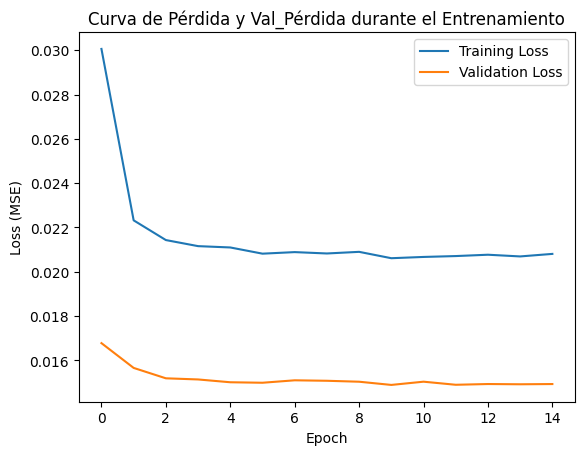

In [153]:
# Construir el modelo LSTM con los mejores hiperparámetros
best_model = create_lstm_model(unit=100)#, optimizer='adam')

# Entrenar el modelo con EarlyStopping
history = best_model.fit(X_train_lstm, y_train, epochs=150, batch_size=16,validation_data=(X_test_lstm, y_test), callbacks=[early_stopping], verbose=1)

# Graficar la curva de pérdida y pérdida en el conjunto de validación del mejor modelo
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Curva de Pérdida y Val_Pérdida durante el Entrenamiento')
plt.legend()
plt.show()

In [161]:
y_pred_lstm_op2 = best_model.predict(X_test_lstm).flatten()

# Calcular las métricas de evaluación utilizando el mejor modelo
mae = mean_absolute_error(y_test, y_pred_lstm_op2)
mse = mean_squared_error(y_test, y_pred_lstm_op2)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) :" ,r2_score(y_test, y_pred_lstm_op2))

  1/656 [..............................] - ETA: 24s

656/656 [==============================] - 1s 1ms/step
Mean Absolute Error (MAE): 0.009674952163453796
Mean Squared Error (MSE): 0.01489089744178974
Root Mean Squared Error (RMSE): 0.12202826492985033
R-squared (R2) : 0.6084484412824913
